### __Natural Language Processing with Disaster Tweets__
#### _Predict which Tweets are about real disasters and which ones are not_
> - https://www.kaggle.com/competitions/nlp-getting-started/overview/description

#### Other Reference Links:
> - EDA & BERT/LSTM FlowChart: https://www.kaggle.com/code/dnyaneshwalwadkar/84-disaster-prediction-with-adv-nlp-adv-eda
> - Cleaning Contractions: https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/ 
> - Remove repeated strings: https://stackoverflow.com/questions/9841303/removing-duplicate-characters-from-a-string
> - Spelling Check: https://stackoverflow.com/questions/13928155/spell-checker-for-python
> - n-grams: https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [1]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
import random
from collections import Counter
from PIL import Image
import random
import string
from joblib import Parallel, delayed
import math

import warnings
warnings.filterwarnings('ignore')

# import packages for sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud

# import regex
import re

# import nltk
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import seaborn
import seaborn as sns

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

# import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
from sklearn.pipeline import Pipeline

# For converting words into frequency counts
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

#for showing 2D plot
%matplotlib inline    

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### __Import Data__

In [2]:
# import train data
test_df = pd.read_csv('../data/test.csv')
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [27]:
# import train data
train_df = pd.read_csv('../data/train.csv')
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
# check for missing data
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

#### __Drop Duplicate Tweets__

In [28]:
# drop a duplicate row, based on column name
train_df = train_df.drop_duplicates(subset='text', keep="first")

# check
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7503 non-null   int64 
 1   keyword   7447 non-null   object
 2   location  5021 non-null   object
 3   text      7503 non-null   object
 4   target    7503 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 351.7+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


#### __Check the Proportion of Target Class__

In [15]:
# checking balance of target class
train_df['target'].value_counts()                 # in numbers
train_df['target'].value_counts()/len(train_df)   # in %

# print each target class proportion in %
perc_0 = (train_df['target'].value_counts()/len(train_df))[0]
perc_1 = (train_df['target'].value_counts()/len(train_df))[1]

print(f"\ntarget class 0 = {round(perc_0*100, 2)} % | target class 1 = {round(perc_1*100, 2)} %")

0    4305
1    3198
Name: target, dtype: int64

0    0.57377
1    0.42623
Name: target, dtype: float64


target class 0 = 57.38 % | target class 1 = 42.62 %


__Matplotlib Bar Plot:__
> - https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
> - https://python-graph-gallery.com/3-control-color-of-barplots
> - https://moonbooks.org/Articles/How-to-plot-a-bar-chart-with-a-colorbar-using-matplotlib-in-python-/
> - https://matplotlib.org/stable/gallery/color/colormap_reference.html
> - https://pythonguides.com/matplotlib-bar-chart-labels/

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, '%')

Text(0.5, 1.0, 'Target Class Balance')

[Text(0, 0, '57.38'), Text(0, 0, '42.62')]

<Figure size 720x720 with 0 Axes>

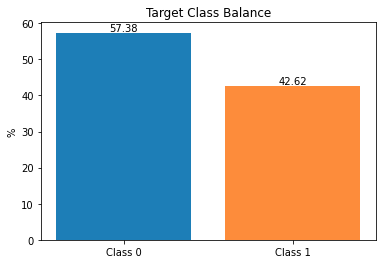



--- 0.5244781970977783 seconds ---


In [7]:
# Plot Bar Plot of Target Class

# start time to measure the time of the program execution
start_time = time.time()

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

# creating the dataset
data = {'Class 0': round(perc_0*100, 2), 'Class 1': round(perc_1*100, 2)}
classes = list(data.keys())
values = list(data.values())

cmap_blue = plt.cm.get_cmap('GnBu')
blue = cmap_blue(0.8)

cmap_org = plt.cm.get_cmap('Oranges')
orange = cmap_org(0.5)

p1 = ax.bar(classes, values, color=[blue, orange])
ax.set_ylabel('%')
ax.set_title('Target Class Balance')
ax.set_xticks(classes)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Make Train Data Balanced by Random Resampling__

In [20]:
# start time to measure the time of the program execution
start_time = time.time()

# get data with target = 0 to be dropped
df = train_df[train_df['target'] == 0]
drop_df = df.sample(n=800, random_state=42)

# KEEP ONLY THOSE WHO ARE NOT IN THE TEST SET
rtrain_df = train_df[~train_df.id.isin(drop_df.id.tolist())]

# check
rtrain_df.info()
rtrain_df

# checking balance of target class
rtrain_df['target'].value_counts()                 # in numbers
rtrain_df['target'].value_counts()/len(rtrain_df)   # in %

# print each target class proportion in %
perc_0d = (rtrain_df['target'].value_counts()/len(rtrain_df))[0]
perc_1d = (rtrain_df['target'].value_counts()/len(rtrain_df))[1]

print(f"\ntarget class 0 = {round(perc_0d*100, 2)} % | target class 1 = {round(perc_1d*100, 2)} %")

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6703 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6703 non-null   int64 
 1   keyword   6651 non-null   object
 2   location  4499 non-null   object
 3   text      6703 non-null   object
 4   target    6703 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 314.2+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


0    3505
1    3198
Name: target, dtype: int64

0    0.5229
1    0.4771
Name: target, dtype: float64


target class 0 = 52.29 % | target class 1 = 47.71 %


--- 0.10576248168945312 seconds ---


<Figure size 720x720 with 0 Axes>

Text(0, 0.5, '%')

Text(0.5, 1.0, 'Target Class Balance')

[Text(0, 0, '52.29'), Text(0, 0, '47.71')]

<Figure size 720x720 with 0 Axes>

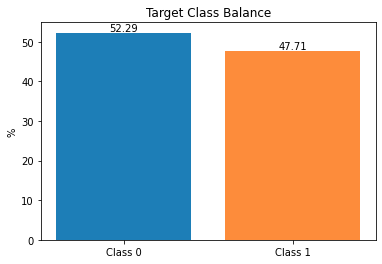



--- 0.44930505752563477 seconds ---


In [21]:
# Plot Bar Plot of Target Class - after balancing train data

# start time to measure the time of the program execution
start_time = time.time()

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

# creating the dataset
data = {'Class 0': round(perc_0d*100, 2), 'Class 1': round(perc_1d*100, 2)}
classes = list(data.keys())
values = list(data.values())

cmap_blue = plt.cm.get_cmap('GnBu')
blue = cmap_blue(0.8)

cmap_org = plt.cm.get_cmap('Oranges')
orange = cmap_org(0.5)

p1 = ax.bar(classes, values, color=[blue, orange])
ax.set_ylabel('%')
ax.set_title('Target Class Balance')
ax.set_xticks(classes)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

### __EDA - Exploratory Data Analysis__

#### __Check Variable Values__

In [22]:
train_df['keyword'].value_counts()
train_df['location'].value_counts()

print(f"\nkeyword: {train_df['keyword'].nunique()} | {train_df['keyword'].unique()}")
print(f"\nlocation: {train_df['location'].nunique()} | {train_df['location'].unique()}")

fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

USA                        104
New York                    71
United States               50
London                      45
Canada                      29
                          ... 
Trackside California         1
he/him or she/her (ask)      1
Some pum pum                 1
Paulton, England             1
Lincoln                      1
Name: location, Length: 3327, dtype: int64


keyword: 221 | [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'd

### __Data Preprocessing__

#### Text Cleaning

- Remove specific regex (i.e. %20)
- Replace abbreviated chat messages to real messages
- Remove url & mention (i.e. @...) from texts
- Clean contraction (i.e. don't, shouldn't...etc)
- Tokenization
- Removing punctuation
- Normalizing
- Stopwords cleaning
- Lemmatizing
- Clean contractions again

#### __Reference Links:__
> - https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
> - https://goodboychan.github.io/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html
> - https://notebook.community/ianozsvald/word2vec_sentences_vs_target_sentence_demo/word2vec%20similarity%20example

In [23]:
rtrain_df.replace(regex={'%20': ' '},inplace=True)

In [24]:
test_df.replace(regex={'%20': ' '},inplace=True)

In [29]:
# Replacing specific texts to standard text

rtrain_df.replace(regex={'U.S.':" USA ",
                        'UNITED STATES': " USA ",
                        'United States': " USA ",
                        'U.s.': " USA ",
                        'US ': " USA ",
                        ' goooooooaaaaaal!!!!!!': " goal ",
                        'LOOOOOOL': " lol ",
                        'Cooool ': " cool ",
                        'SOOOO ': " so "}, inplace=True)

In [30]:
test_df.replace(regex={'U.S.':" USA ",
                        'UNITED STATES': " USA ",
                        'United States': " USA ",
                        'U.s.': " USA ",
                        'US ': " USA ",
                        ' goooooooaaaaaal!!!!!!': " goal ",
                        'LOOOOOOL': " lol ",
                        'Cooool ': " cool ",
                        'SOOOO ': " so "}, inplace=True)

In [31]:
# Replacing chat messages to real message

rtrain_df.replace(regex={'AFAIK':'As Far As I Know',
' AFAIK ':'As Far As I Know',
' afaik ':'As Far As I Know',
' AFK ':' Away From Keyboard ',
' afk ':' Away From Keyboard ',
' ASAP ':' As Soon As Possible ',
' asap ':' As Soon As Possible ',
' ATK ':' At The Keyboard ',
' atk ':' At The Keyboard ',
' ATM ':' At The Moment ',
' atm ':' At The Moment ',
' A3 ':' Anytime, Anywhere, Anyplace ',
' a3 ':' Anytime, Anywhere, Anyplace ',
' BAK ':' Back At Keyboard ',
' bak ':' Back At Keyboard ',
' BBL ':' Be Back Later ',
' bbl ':' Be Back Later ',
' BBS ':' Be Back Soon ',
' bbs ':' Be Back Soon ',
' BFN ':' Bye For Now ',
' bfn ':' Bye For Now ',
' B4N ':' Bye For Now ',
' b4n ':' Bye For Now ',
' BRB ':' Be Right Back ',
' brb ':' Be Right Back ',
' BRT ':' Be Right There ',
' brt ':' Be Right There ',
' BTW ':' By The Way ',
' btw ':" By The Way ",
' B4 ':' Before ',
' b4 ':' Before ',
' B4N ':' Bye For Now ',
' b4n ':' Bye For Now ',
' CU ':' See You ',
' cu ':' See You ',
' CUL8R ':' See You Later ',
' cul8r ':' See You Later ',
' CYA ':' See You ',
' cya ':' See You ',
' FAQ ':' Frequently Asked Questions ',
' faq ':' Frequently Asked Questions ',
' FC ':' Fingers Crossed ',
' fc ':' Fingers Crossed ',
' FWIW ':" For What It's Worth ",
' fwiw ':" For What It's Worth ",
' FYI ':' For Your Information ',
' fyi ':' For Your Information ',
' GAL ':' Get A Life ',
' gal ':' Get A Life ',
' GG ':' Good Game ',
' gg ':' Good Game ',
' GN ':' Good Night ',
' gn ':' Good Night ',
' GMTA ':' Great Minds Think Alike ',
' gmta ':' Great Minds Think Alike ',
' GR8 ':" Great! ",
' gr8 ':" Great! ",
' G9 ':" Genius ",
' g9 ':" Genius ",
' IC ':" I See ",
' ic ':" I See ",
' ICQ ':" I Seek you ",
' icq ':" I Seek you ",
' ILU ':" I Love You ",
' ilu ':" I Love You ",
' IMHO ':" In My Honest ",
' imho ':" In My Honest ",
' IMO ':" In My Opinion ",
' imo ':" In My Opinion ",
' IOW ':" In Other Words ",
' iow ':" In Other Words ",
' IRL ':" In Real Life ",
' irl ':" In Real Life ",
' KISS ':" Keep It Simple, Stupid ",
' LDR ':" Long Distance Relationship ",
' ldr ':" Long Distance Relationship ",
' LMAO ':" Laugh My Ass ",
' lmao ':" Laugh My Ass ",
' LOL ':" Laughing Out Loud ",
' lol ':" Laughing Out Loud ",
'lol ':" Laughing Out Loud ",
' LTNS ':" Long Time No See ",
' ltns ':" Long Time No See ",
' L8R ':" Later ",
' l8r ':" Later ",
' MTE ':" My Thoughts Exactly ",
' mte ':" My Thoughts Exactly ",
' M8 ':" Mate ",
' m8 ':" Mate ",
' NRN ':" No Reply Necessary ",
' nrn ':" No Reply Necessary ",
' OIC ':" Oh I See ",
' oic ':" Oh I See ",
' PITA ':" Pain In The Ass ",
' pita ':" Pain In The Ass ",
' PRT ':" Party ",
' prt ':" Party ",
' PRW ':" Parents Are Watching ",
' prw ':" Parents Are Watching ",
' ROFL ':" Rolling On The Floor Laughing ",
' rofl ':" Rolling On The Floor Laughing ",
' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
' roflol ':" Rolling On The Floor Laughing Out Loud ",
' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
' rotflmao ':" Rolling On The Floor Laughing My Ass ",
' SK8 ':" Skate ",
' sk8 ':" Skate ",
' STATS ':" Your sex and age ",
' ASL ':" Age, Sex, Location ",
' asl ':" Age, Sex, Location ",
' THX ':" Thank You ",
' thx ':" Thank You ",
' TTFN ':" Ta-Ta For Now! ",
' ttfn ':" Ta-Ta For Now! ",
' TTYL ':" Talk To You Later ",
' ttyl ':" Talk To You Later ",
' U ':" You ",
' u ':" You ",
' U2 ':" You Too",
' u2 ':" You Too ",
' U4E ':" Yours For Ever ",
' u4e ':" Yours For Ever ",
' WB ':" Welcome Back ",
' wb ':" Welcome Back ",
' w8 ': " Wait... ",
' wuf ': " Where Are You From? ",
' wtg ': " Way To Go! ",
' wtf ': " What The Fuck ",
' WTF ':" What The Fuck ",
' WTG ':" Way To Go! ",
' WUF ':" Where Are You From? ",
' W8 ':" Wait... ",},inplace=True)

In [32]:
# do the same replacement in test_df
test_df.replace(regex={'AFAIK':'As Far As I Know',
' AFAIK ':'As Far As I Know',
' afaik ':'As Far As I Know',
' AFK ':' Away From Keyboard ',
' afk ':' Away From Keyboard ',
' ASAP ':' As Soon As Possible ',
' asap ':' As Soon As Possible ',
' ATK ':' At The Keyboard ',
' atk ':' At The Keyboard ',
' ATM ':' At The Moment ',
' atm ':' At The Moment ',
' A3 ':' Anytime, Anywhere, Anyplace ',
' a3 ':' Anytime, Anywhere, Anyplace ',
' BAK ':' Back At Keyboard ',
' bak ':' Back At Keyboard ',
' BBL ':' Be Back Later ',
' bbl ':' Be Back Later ',
' BBS ':' Be Back Soon ',
' bbs ':' Be Back Soon ',
' BFN ':' Bye For Now ',
' bfn ':' Bye For Now ',
' B4N ':' Bye For Now ',
' b4n ':' Bye For Now ',
' BRB ':' Be Right Back ',
' brb ':' Be Right Back ',
' BRT ':' Be Right There ',
' brt ':' Be Right There ',
' BTW ':' By The Way ',
' btw ':" By The Way ",
' B4 ':' Before ',
' b4 ':' Before ',
' B4N ':' Bye For Now ',
' b4n ':' Bye For Now ',
' CU ':' See You ',
' cu ':' See You ',
' CUL8R ':' See You Later ',
' cul8r ':' See You Later ',
' CYA ':' See You ',
' cya ':' See You ',
' FAQ ':' Frequently Asked Questions ',
' faq ':' Frequently Asked Questions ',
' FC ':' Fingers Crossed ',
' fc ':' Fingers Crossed ',
' FWIW ':" For What It's Worth ",
' fwiw ':" For What It's Worth ",
' FYI ':' For Your Information ',
' fyi ':' For Your Information ',
' GAL ':' Get A Life ',
' gal ':' Get A Life ',
' GG ':' Good Game ',
' gg ':' Good Game ',
' GN ':' Good Night ',
' gn ':' Good Night ',
' GMTA ':' Great Minds Think Alike ',
' gmta ':' Great Minds Think Alike ',
' GR8 ':" Great! ",
' gr8 ':" Great! ",
' G9 ':" Genius ",
' g9 ':" Genius ",
' IC ':" I See ",
' ic ':" I See ",
' ICQ ':" I Seek you ",
' icq ':" I Seek you ",
' ILU ':" I Love You ",
' ilu ':" I Love You ",
' IMHO ':" In My Honest ",
' imho ':" In My Honest ",
' IMO ':" In My Opinion ",
' imo ':" In My Opinion ",
' IOW ':" In Other Words ",
' iow ':" In Other Words ",
' IRL ':" In Real Life ",
' irl ':" In Real Life ",
' KISS ':" Keep It Simple, Stupid ",
' LDR ':" Long Distance Relationship ",
' ldr ':" Long Distance Relationship ",
' LMAO ':" Laugh My Ass ",
' lmao ':" Laugh My Ass ",
' LOL ':" Laughing Out Loud ",
' lol ':" Laughing Out Loud ",
'lol ':" Laughing Out Loud ",
' LTNS ':" Long Time No See ",
' ltns ':" Long Time No See ",
' L8R ':" Later ",
' l8r ':" Later ",
' MTE ':" My Thoughts Exactly ",
' mte ':" My Thoughts Exactly ",
' M8 ':" Mate ",
' m8 ':" Mate ",
' NRN ':" No Reply Necessary ",
' nrn ':" No Reply Necessary ",
' OIC ':" Oh I See ",
' oic ':" Oh I See ",
' PITA ':" Pain In The Ass ",
' pita ':" Pain In The Ass ",
' PRT ':" Party ",
' prt ':" Party ",
' PRW ':" Parents Are Watching ",
' prw ':" Parents Are Watching ",
' ROFL ':" Rolling On The Floor Laughing ",
' rofl ':" Rolling On The Floor Laughing ",
' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
' roflol ':" Rolling On The Floor Laughing Out Loud ",
' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
' rotflmao ':" Rolling On The Floor Laughing My Ass ",
' SK8 ':" Skate ",
' sk8 ':" Skate ",
' STATS ':" Your sex and age ",
' ASL ':" Age, Sex, Location ",
' asl ':" Age, Sex, Location ",
' THX ':" Thank You ",
' thx ':" Thank You ",
' TTFN ':" Ta-Ta For Now! ",
' ttfn ':" Ta-Ta For Now! ",
' TTYL ':" Talk To You Later ",
' ttyl ':" Talk To You Later ",
' U ':" You ",
' u ':" You ",
' U2 ':" You Too",
' u2 ':" You Too ",
' U4E ':" Yours For Ever ",
' u4e ':" Yours For Ever ",
' WB ':" Welcome Back ",
' wb ':" Welcome Back ",
' w8 ': " Wait... ",
' wuf ': " Where Are You From? ",
' wtg ': " Way To Go! ",
' wtf ': " What The Fuck ",
' WTF ':" What The Fuck ",
' WTG ':" Way To Go! ",
' WUF ':" Where Are You From? ",
' W8 ':" Wait... ",},inplace=True)

In [79]:
# quick test of removing url & specific mentions from text
text2 = train_df['text'][7408]
text1 = train_df['text'][677]
text3 = train_df['text'][70]

print('\n', text1)
print('\n', text2)
print('\n', text3)

print('\n')
text1 = re.sub(r'https?://\S+', ' ', text1, flags=re.MULTILINE)
text1 = re.sub(r'<.*?>', ' ', text1, flags=re.MULTILINE)
text1 = re.sub(r'\d+', ' ', text1, flags=re.MULTILINE)
#text1 = re.sub(r'#\w+', ' ', text1, flags=re.MULTILINE)
text1 = re.sub(r'@\w+', ' ', text1, flags=re.MULTILINE)
text1 = re.sub(r'[^a-zA-Z]', ' ', text1, flags=re.MULTILINE)
text1 = re.sub(r'http\S+', ' ', text1, flags=re.MULTILINE)
text1 = re.sub(r'amp', ' ', text1, flags=re.MULTILINE)

text1



 https://t.co/WKv8VqVkT6 #ArtisteOfTheWeekFact say #Conversations by #coast2coastdjs agree @Crystal_Blaz 's #Jiwonle is a #HipHop #ClubBanger

 California cops have sketch of gunman who killed one wounded two deputies via the @FoxNews app http://t.co/3Ife1zsop7

 http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour




'   ArtisteOfTheWeekFact say  Conversations by  coast coastdjs agree    s  Jiwonle is a  HipHop  ClubBanger'

In [33]:
# function for removing any url within string
def remove_url(text):

    text = re.sub(r'https?://\S+', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z]', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'http\S+', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'amp', ' ', text, flags=re.MULTILINE)
    
    return text

In [81]:
# quick test for the function 'remove_url()'
text1 = train_df['text'][7408]
text2 = train_df['text'][677]
text3 = train_df['text'][70]

text1
text2
text3

print('\n')
remove_url(text1)
print('\n')
remove_url(text2)
print('\n')
remove_url(text3)

'California cops have sketch of gunman who killed one wounded two deputies via the @FoxNews app http://t.co/3Ife1zsop7'

"https://t.co/WKv8VqVkT6 #ArtisteOfTheWeekFact say #Conversations by #coast2coastdjs agree @Crystal_Blaz 's #Jiwonle is a #HipHop #ClubBanger"

'http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour'

'California cops have sketch of gunman who killed one wounded two deputies via the   app  '

'   ArtisteOfTheWeekFact say  Conversations by  coast coastdjs agree    s  Jiwonle is a  HipHop  ClubBanger'

'  Had a  personalinjury accident this summer  Read our advice     see how a  solicitor can help  OtleyHour'

-----------------------------
#### Cleaning Contractions

In [34]:
import sys  
!{sys.executable} -m pip install contractions

In [35]:
# testing - clean contractions in text

# import library
import contractions
# contracted text
text = '''I'll be there within 5 min. Shouldn't you be there too?
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.'''
 
# creating an empty list
expanded_words = []   
for word in text.split():
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))  
   
expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)

Original text: I'll be there within 5 min. Shouldn't you be there too?
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.
Expanded_text: I will be there within 5 min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends. We have been waiting for this day for so long.


In [36]:
# function for cleaning contractions
def clean_contractions(text):
    
    # creating an empty list
    expanded_words = []
    
    for word in text.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))
    
    expanded_text = ' '.join(expanded_words)
    
    return expanded_text        

In [102]:
# quick test - 'clean_contractions' function
text1 = train_df['text'][3978]
text2 = train_df['text'][3564]
text3 = "I'm i'm shouldn't u this true we'll you can't"
text4 = "deed reason earthquake may allah forgive u"

text1
text2
text3
text4

clean_contractions(text1)
clean_contractions(text2)
clean_contractions(text3)
clean_contractions(text4)

"Wen I finally get the girl I want I'm flooding yall wit all pics of us Rs tho"

"I've experienced the smell of rotting potatoes for the first time. The Famine must have been awful if the whole country smelled like that."

"I'm i'm shouldn't u this true we'll you can't"

'deed reason earthquake may allah forgive u'

'Wen I finally get the girl I want I am flooding you all wit all pics of us Rs tho'

'I have experienced the smell of rotting potatoes for the first time. The Famine must have been awful if the whole country smelled like that.'

'I am i am should not you this true we will you cannot'

'deed reason earthquake may allah forgive you'

---------------------------------------

In [38]:
# text the best way to tokenize words
import nltk
nltk.download('punkt')

text1 = "Wen I finally get the girl I want I'm flooding yall wit all pics of us Rs tho"
text1.split()
word_tokenize(text1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

['Wen',
 'I',
 'finally',
 'get',
 'the',
 'girl',
 'I',
 'want',
 "I'm",
 'flooding',
 'yall',
 'wit',
 'all',
 'pics',
 'of',
 'us',
 'Rs',
 'tho']

['Wen',
 'I',
 'finally',
 'get',
 'the',
 'girl',
 'I',
 'want',
 'I',
 "'m",
 'flooding',
 'yall',
 'wit',
 'all',
 'pics',
 'of',
 'us',
 'Rs',
 'tho']

In [39]:
# function that splits a sentence to a list of words
def words_token(text):
    # split into words by white space
    words = word_tokenize(text)
    
    return words

In [40]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [41]:
# function for removing punctuations
def remove_punc(words):

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped_words = [w.translate(table) for w in words]
    
    return stripped_words

In [42]:
# function for normalizing texts
def normalize(words):

    # convert to lower case
    words = [word.lower() for word in words]
    
    return words

In [43]:
!pip install unidecode

In [44]:
import unidecode
s = u'Ábcdêãçoàúü'
n = 'Ábcdêãçoàúü'
unidecode.unidecode(s)
unidecode.unidecode(n)

'Abcdeacoauu'

'Abcdeacoauu'

In [45]:
# function for removing stop words
def remove_unicode(words):

    words = [unidecode.unidecode(w) for w in words]
    
    return words

In [46]:
import re
s = "There are only 4 classes left."
re.sub(r'\d+', '', s)

'There are only  classes left.'

In [47]:
# function for removing numbers
def remove_numbers(words):

    words = [re.sub(r'\d+', '', w) for w in words]
    
    return words

In [52]:
# function for removing repeated sequence of characters
pattern = re.compile(r'(.)\1*')

def reduce_sequence_word(word):
    return ''.join([match.group()[:2] 
                    if len(match.group()) > 2 
                    else match.group() for match in pattern.finditer(word)])

def reduce_sequence_tweet(tweet):
    
    tweet = [reduce_sequence_word(w) for w in tweet]
    
    return tweet

In [53]:
# quick test of reduce_sequence_word/tweet functions
text_1 = 'coooooool looool soooooo nice'
text_2 = 'wrooooong'

reduce_sequence_word(text_2)
reduce_sequence_word(text_1)
reduce_sequence_tweet(text_1.split())

'wroong'

'cool lool soo nice'

['cool', 'lool', 'soo', 'nice']

------------------------
#### Spelling Check - Not Used

In [22]:
!pip install pattern

     |████████████████████████████████| 22.2 MB 12.4 MB/s 
     |████████████████████████████████| 87 kB 5.0 MB/s 
     |████████████████████████████████| 81 kB 7.5 MB/s 
     |████████████████████████████████| 5.6 MB 47.5 MB/s 
     |████████████████████████████████| 5.6 MB 30.5 MB/s 
     |████████████████████████████████| 419 kB 35.4 MB/s 
     |████████████████████████████████| 104 kB 57.6 MB/s 
     |████████████████████████████████| 3.6 MB 34.3 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=ea5ab57a421aea38a20e9e753b2ab529362b286b1677410aadf1c63be7cb71e6
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.1.0-cp37-cp37m-linux_x86_64.whl size=99959 sha256=611afe6f8cd34f9692a17442edf65904831d9da0c027bbfa0ab5abed9904465d
  Stored in directory: /root/.cache/pip/wheels/97/d4/df/08cd6e1fa4a8691b268ab254bd0fa589827ab5b65638c010b4
 

In [24]:
from pattern.en import suggest

suggest(u'caar')
suggest(u'mussage')
suggest(u'survice')
suggest(u'hte')
suggest(u"wisky")

[('car', 0.5), ('czar', 0.42857142857142855), ('saar', 0.07142857142857142)]

[('message', 0.6216216216216216), ('massage', 0.3783783783783784)]

[('service', 0.9253112033195021), ('survive', 0.07468879668049792)]

[('the', 0.8653201565642368),
 ('he', 0.13408515883485067),
 ('ate', 0.00022706139307570876),
 ('hate', 0.0002162489457863893),
 ('hue', 0.00012974936747183358),
 ('te', 1.0812447289319465e-05),
 ('htm', 1.0812447289319465e-05)]

[('whisky', 0.9333333333333333), ('risky', 0.06666666666666667)]

In [25]:
suggest(u'caar')[0][0]
w = 'mussage'
suggest(w)[0][0]

'car'

'message'

In [59]:
from autocorrect import Speller

spell = Speller(lang='en')

print(spell('caaaar'))
print(spell('mussage'))
print(spell('survice'))
print(spell('hte'))

aaaaaa
message
service
the


In [60]:
!pip install pyspellchecker

In [61]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happenning
{'hapening', 'happenning'}


In [66]:
spell.correction('coooooooooool')

'coooooooooool'

In [26]:
# function for spelling check
def spell_check(words):

    words = [suggest(w)[0][0] for w in words]
    
    return words

------------------------------------

In [54]:
# function for removing stop words
def remove_stopwords(words):

    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    return words

In [55]:
# function for lemmatizing texts
def lemmatize(words):

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

---------------
#### Stemming - Not Used

In [56]:
# function:
def stem_text(words):

    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    
    return stemmed

------------------------------------

In [57]:
# function for preprocessing all the steps above
def preprocess_all(text):
    
    no_url = remove_url(text)
    no_contract = clean_contractions(no_url)
    words = words_token(no_contract)
    no_numbers = remove_numbers(words)
    no_unicode = remove_unicode(no_numbers)
    words_no_punc = remove_punc(no_unicode)
    words_normalized = normalize(words_no_punc)
    no_repeated_chr = reduce_sequence_tweet(words_normalized)
    #words_spellchecked = spell_check(words_normalized)
    no_stop__words = remove_stopwords(no_repeated_chr)
    lemmatized = lemmatize(no_stop__words)
    words_no_punc2 = remove_punc(lemmatized)
    sentence = " ".join(words_no_punc2)
    sentence = clean_contractions(sentence)
    sentence = " ".join(sentence.split())
    #preprocessed_words = stem_text(lemmatized)
    
    return sentence

In [59]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

quick_test = [preprocess_all(data) for data in rtrain_df['text'][:36]]
quick_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

['deed reason earthquake may allah forgive you',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain because flash flooding street manitou colorado spring area',
 'top hill see fire wood',
 'emergency evacuation happening building across street',
 'afraid tornado coming area',
 'three people died heat wave far',
 'haha south getting flooded hah wait second live south tampa going going fvck flooding',
 'raining flooding florida abay day lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goal',
 'ridiculous',
 'london cool',
 'love skiing',
 'laughing loud',
 'way eat shit',
 'nyc 

In [60]:
# Preprocess train_df

# start time to measure the time of the program execution
start_time = time.time()

rtrain_df['text_preprocessed'] = rtrain_df['text'].apply(preprocess_all)

# check
rtrain_df.info()
rtrain_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6703 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 6703 non-null   int64 
 1   keyword            6651 non-null   object
 2   location           4499 non-null   object
 3   text               6703 non-null   object
 4   target             6703 non-null   int64 
 5   text_preprocessed  6703 non-null   object
dtypes: int64(2), object(4)
memory usage: 366.6+ KB


,id,keyword,location,text,target,text_preprocessed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive you
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines g link tram update...
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...




--- 37.81628179550171 seconds ---


In [61]:
# Preprocess test_df

# start time to measure the time of the program execution
start_time = time.time()

test_df['text_preprocessed'] = test_df['text'].apply(preprocess_all)

# check
test_df.info()
test_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3263 non-null   int64 
 1   keyword            3237 non-null   object
 2   location           2158 non-null   object
 3   text               3263 non-null   object
 4   text_preprocessed  3263 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB


,id,keyword,location,text,text_preprocessed
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo




--- 17.846001148223877 seconds ---


In [62]:
# export to csv for further manual preprocessing
rtrain_df.to_csv('../data/preprocessed_train_data.csv', index=False)
test_df.to_csv('../data/preprocessed_test_data.csv', index=False)

In [64]:
# import preprocessed train_df
rtrain_df = pd.read_csv('../data/preprocessed_train_data.csv')
#train_df = train_df.drop(['Unnamed: 0'], axis=1)
rtrain_df.info()
rtrain_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 6703 non-null   int64 
 1   keyword            6651 non-null   object
 2   location           4499 non-null   object
 3   text               6703 non-null   object
 4   target             6703 non-null   int64 
 5   text_preprocessed  6701 non-null   object
dtypes: int64(2), object(4)
memory usage: 314.3+ KB


,id,keyword,location,text,target,text_preprocessed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive you
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
6698,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines g link tram update...
6699,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...
6700,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...
6701,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...


In [65]:
# import preprocessed test_df
test_df = pd.read_csv('../data/preprocessed_test_data.csv')
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3263 non-null   int64 
 1   keyword            3237 non-null   object
 2   location           2158 non-null   object
 3   text               3263 non-null   object
 4   text_preprocessed  3262 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB


,id,keyword,location,text,text_preprocessed
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo


In [66]:
# fill missing data (NaN) with "None" - rtrain_df (preprocessed train_df)
rtrain_df['keyword'] = rtrain_df['keyword'].fillna("None")
rtrain_df['location'] = rtrain_df['location'].fillna("None")
rtrain_df

,id,keyword,location,text,target,text_preprocessed
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive you
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
6698,10863,None,None,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines g link tram update...
6699,10864,None,None,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...
6700,10866,None,None,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...
6701,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...


In [83]:
# fill missing data (NaN) with "None" - train_df (unpreprocessed train_df)
train_df['keyword'] = train_df['keyword'].fillna("None")
train_df['location'] = train_df['location'].fillna("None")
train_df

,id,keyword,location,text,target
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1
1,4,None,None,Forest fire near La Ronge Sask. Canada,1
2,5,None,None,All residents asked to 'shelter in place' are ...,1
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7604,10863,None,None,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,None,None,on the flip side I'm at Walmart and there is a...,1
7606,10866,None,None,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,None,None,Two giant cranes holding a bridge collapse int...,1


In [67]:
# fill missing data (NaN) with "None" - test_df
test_df['keyword'] = test_df['keyword'].fillna("None")
test_df['location'] = test_df['location'].fillna("None")
test_df

,id,keyword,location,text,text_preprocessed
0,0,None,None,Just happened a terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo


In [68]:
test_df.isnull().sum()

id                   0
keyword              0
location             0
text                 0
text_preprocessed    1
dtype: int64

In [69]:
rtrain_df.isnull().sum()

id                   0
keyword              0
location             0
text                 0
target               0
text_preprocessed    2
dtype: int64

In [70]:
test_df['text_preprocessed'] = test_df['text_preprocessed'].fillna("None")
test_df.isnull().sum()
test_df

rtrain_df['text_preprocessed'] = rtrain_df['text_preprocessed'].fillna("None")
rtrain_df.isnull().sum()
rtrain_df

id                   0
keyword              0
location             0
text                 0
text_preprocessed    0
dtype: int64

,id,keyword,location,text,text_preprocessed
0,0,None,None,Just happened a terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo


id                   0
keyword              0
location             0
text                 0
target               0
text_preprocessed    0
dtype: int64

,id,keyword,location,text,target,text_preprocessed
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive you
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
6698,10863,None,None,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines g link tram update...
6699,10864,None,None,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...
6700,10866,None,None,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...
6701,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...


In [71]:
# test removing specific words - 'im', 'u' and 'amp':
text = rtrain_df['text_preprocessed'][0]
words = word_tokenize(text)
words
words = ['' if w == 'u' else w for w in words]
words = ['' if w == 'im' else w for w in words]
words = ['' if w == 'amp' else w for w in words]
words

['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'you']

['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'you']

In [72]:
# function for removing 'im', 'u', 'amp' and 'rt':
def remove_specificWords(words):

    words = ['' if w == 'u' else w for w in words]
    words = ['' if w == 'im' else w for w in words]
    words = ['' if w == 'amp' else w for w in words]
    words = ['' if w == 'rt' else w for w in words]
    
    return words

In [73]:
# function for preprocessing again
def preprocess_again(text):
    
    words = words_token(text)
    no_specific = remove_specificWords(words)
    
    sentence = " ".join(no_specific)
    sentence = " ".join(sentence.split())
    
    return sentence

In [74]:
# Preprocess quora question 1

# start time to measure the time of the program execution
start_time = time.time()

rtrain_df['text_preprocessed_2nd'] = rtrain_df['text_preprocessed'].apply(preprocess_again)

# check
rtrain_df.info()
rtrain_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6703 non-null   int64 
 1   keyword                6703 non-null   object
 2   location               6703 non-null   object
 3   text                   6703 non-null   object
 4   target                 6703 non-null   int64 
 5   text_preprocessed      6703 non-null   object
 6   text_preprocessed_2nd  6703 non-null   object
dtypes: int64(2), object(5)
memory usage: 366.7+ KB


,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive you,deed reason earthquake may allah forgive you
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
6698,10863,None,None,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines g link tram update...,worldnews fallen powerlines g link tram update...
6699,10864,None,None,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...,flip side walmart bomb everyone evacuate stay ...
6700,10866,None,None,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...,suicide bomber kill saudi security site mosque...
6701,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,two giant crane holding bridge collapse nearby...




--- 2.185899257659912 seconds ---


In [75]:
test_df['text_preprocessed_2nd'] = test_df['text_preprocessed'].apply(preprocess_again)
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     3263 non-null   int64 
 1   keyword                3263 non-null   object
 2   location               3263 non-null   object
 3   text                   3263 non-null   object
 4   text_preprocessed      3263 non-null   object
 5   text_preprocessed_2nd  3263 non-null   object
dtypes: int64(1), object(5)
memory usage: 153.1+ KB


,id,keyword,location,text,text_preprocessed,text_preprocessed_2nd
0,0,None,None,Just happened a terrible car crash,happened terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...,earthquake safety los angeles safety fastener ...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...,storm ri worse last hurricane city others hard...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,green line derailment chicago
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,meg issue hazardous weather outlook hwo


In [76]:
test_df.isnull().sum()

id                       0
keyword                  0
location                 0
text                     0
text_preprocessed        0
text_preprocessed_2nd    0
dtype: int64

In [81]:
rtrain_df.isnull().sum()

id                       0
keyword                  0
location                 0
text                     0
target                   0
text_preprocessed        0
text_preprocessed_2nd    0
dtype: int64

In [79]:
rtrain_df[rtrain_df['text_preprocessed']=='None']
rtrain_df.iloc[3913, :]
rtrain_df.iloc[5958, :]

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
3913,6394,hurricane,NAWF SIDE POKING OUT,@Hurricane_Dame ???????? I don't have them the...,1,None,None
5958,9697,tornado,None,@Ayshun_Tornado then don't,0,None,None


id                                                                    6394
keyword                                                          hurricane
location                                             NAWF SIDE POKING OUT 
text                     @Hurricane_Dame ???????? I don't have them the...
target                                                                   1
text_preprocessed                                                     None
text_preprocessed_2nd                                                 None
Name: 3913, dtype: object

id                                             9697
keyword                                     tornado
location                                       None
text                     @Ayshun_Tornado then don't
target                                            0
text_preprocessed                              None
text_preprocessed_2nd                          None
Name: 5958, dtype: object

In [80]:
test_df.iloc[13, :]

id                              43
keyword                       None
location                      None
text                     What if?!
text_preprocessed             None
text_preprocessed_2nd         None
Name: 13, dtype: object

In [82]:
# export to csv for record
rtrain_df.to_csv('../data/preprocessed2nd_train_data.csv', index=False)
test_df.to_csv('../data/preprocessed2nd_test_data.csv', index=False)

#### __Analyze Text Statistics__
> - Reference Links: 
    * https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
    * https://stackoverflow.com/questions/29216889/slicing-a-dictionary
    * https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    * https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php
    * https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
    * https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    * https://www.analyticsvidhya.com/blog/2021/11/pattern-library-for-natural-language-processing-in-python/
    * https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public

> - WordCloud: 
  * https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214
  * https://matplotlib.org/stable/gallery/color/colormap_reference.html

<AxesSubplot:>

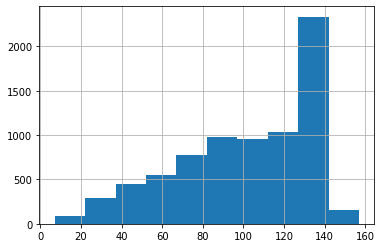

In [5]:
# the number of characters present in each sentence
# rough idea about the text length
train_df['text'].str.len().hist()

(array([  31.,   62.,  128.,  188.,  356.,  484.,  424.,  409., 1101.,
          15.]),
 array([ 14. ,  28.6,  43.2,  57.8,  72.4,  87. , 101.6, 116.2, 130.8,
        145.4, 160. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Disaster Tweets')

(array([  77.,  234.,  349.,  381.,  468.,  493.,  526.,  557., 1117.,
         103.]),
 array([  7.,  22.,  37.,  52.,  67.,  82.,  97., 112., 127., 142., 157.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Non-disaster Tweets')

Text(0.5, 0.98, 'Number of Characters in Tweets')

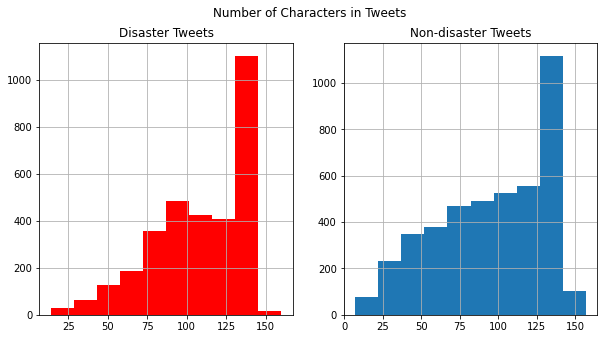

In [144]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len = train_df[train_df['target']==1]['text'].str.len()
ax1.hist(tweet_len, color='red')
ax1.set_title('Disaster Tweets')
ax1.grid()

tweet_len = train_df[train_df['target']==0]['text'].str.len()
ax2.hist(tweet_len)
ax2.set_title('Non-disaster Tweets')
ax2.grid()

fig.suptitle('Number of Characters in Tweets')
plt.show()

twitter text ranges between 10 and 155 characters, heavy concentraion around 130-140 characters.

<AxesSubplot:>

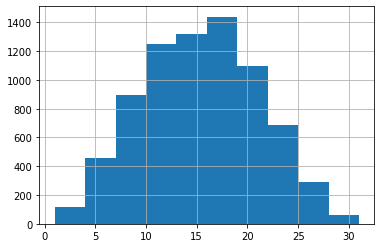

In [ ]:
# plot the number of words appearing in each tweet.
train_df['text'].str.split().\
    map(lambda x: len(x)).\
    hist()

(array([ 40., 170., 416., 617., 406., 700., 487., 266.,  84.,  12.]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Disaster Tweets')

(array([100., 341., 531., 691., 682., 716., 573., 410., 208.,  53.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Non-disaster Tweets')

Text(0.5, 0.98, 'Number of Words in Each Tweet')

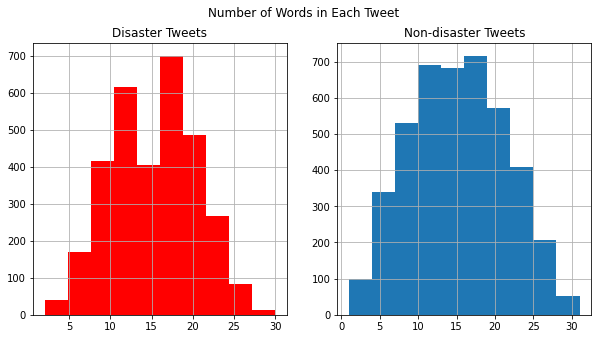

In [145]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len = train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='red')
ax1.set_title('Disaster Tweets')
ax1.grid()

tweet_len = train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len)
ax2.set_title('Non-disaster Tweets')
ax2.grid()

fig.suptitle('Number of Words in Each Tweet')
plt.show()

twitter text ranges between 2 and 32 words, heavy concentraion around 12-18 words.

<AxesSubplot:>

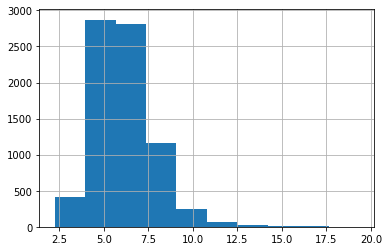

In [ ]:
# check the average word length in each sentence.
train_df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

<AxesSubplot:xlabel='text', ylabel='Density'>

Text(0.5, 1.0, 'Disaster')

<AxesSubplot:xlabel='text', ylabel='Density'>

Text(0.5, 1.0, 'Non-disaster')

Text(0.5, 0.98, 'Average Word Length in Each Tweet')

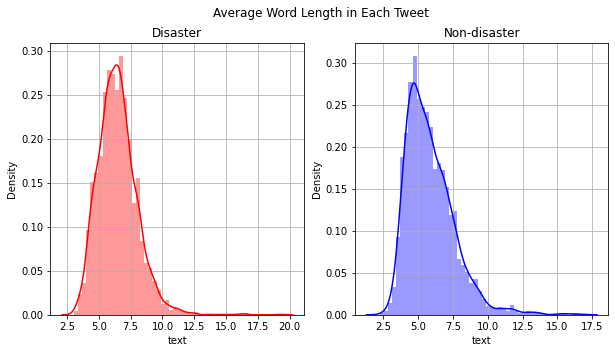

In [146]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

word = train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title('Disaster')
ax1.grid()

word = train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='blue')
ax2.set_title('Non-disaster')
ax2.grid()

fig.suptitle('Average Word Length in Each Tweet')

<BarContainer object of 20 artists>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'A particular keywords from the disaster tweet (may be blank)')

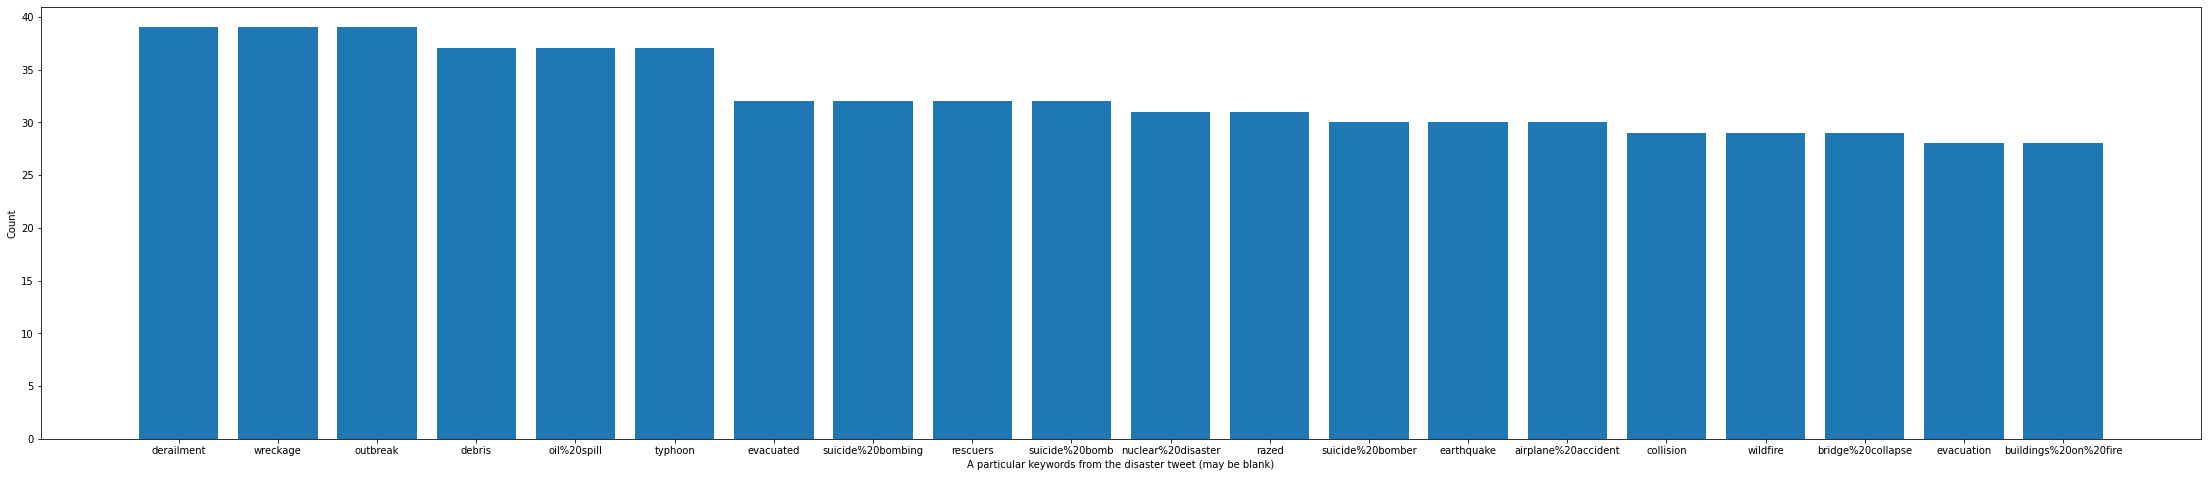

In [8]:
palette=sns.color_palette('magma')
data=pd.DataFrame((train_df[train_df['target']==1]).groupby(['keyword']).count().id.sort_values(ascending=False)[:20]).reset_index()
fig=plt.figure(figsize=(30,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(data.keyword,data.id)
ax.set_ylabel('Count')
ax.set_xlabel('A particular keywords from the disaster tweet (may be blank)')

<BarContainer object of 20 artists>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'A particular keywords from the not-disaster tweet (may be blank)')

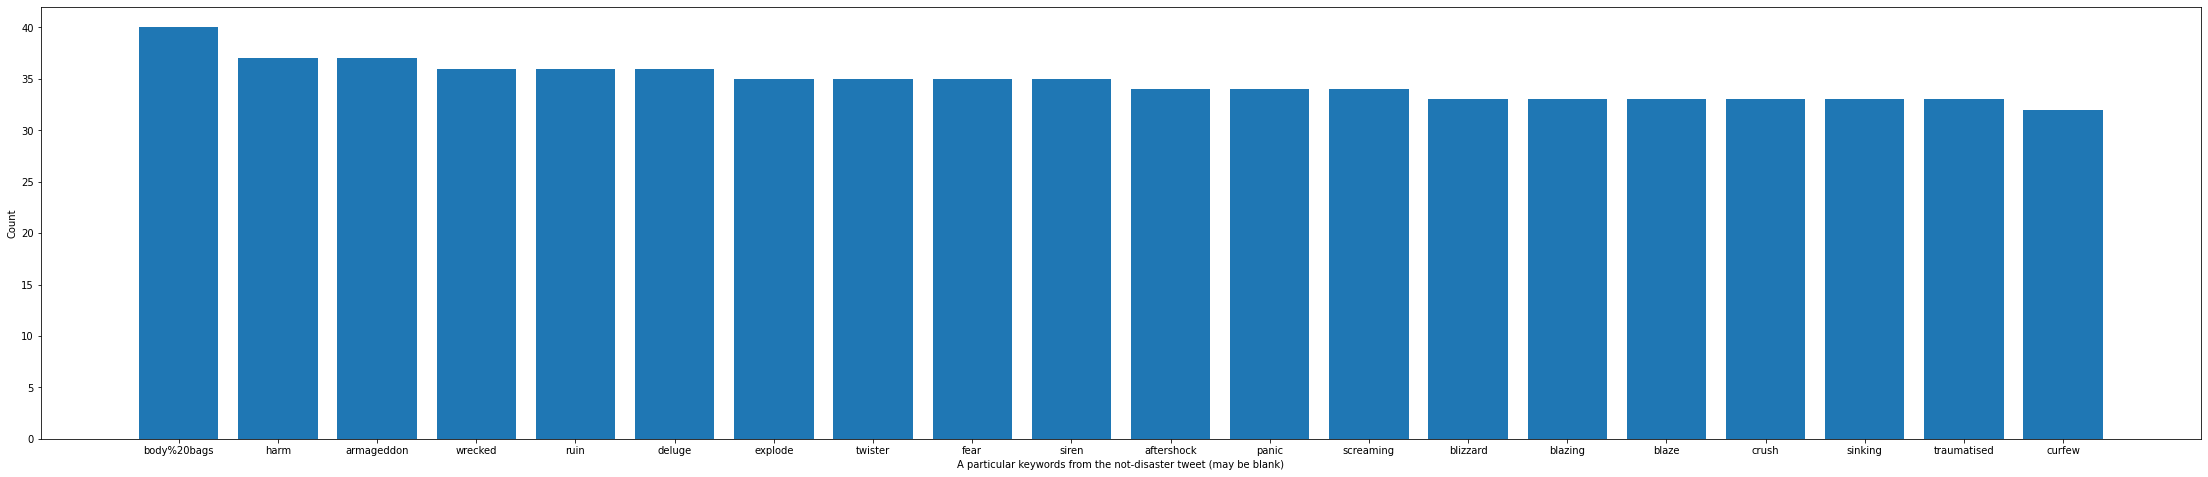

In [9]:
data=pd.DataFrame((train_df[train_df['target']==0]).groupby(['keyword']).count().id.sort_values(ascending=False)[:20]).reset_index()
fig=plt.figure(figsize=(30,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(data.keyword,data.id)
ax.set_ylabel('Count')
ax.set_xlabel('A particular keywords from the not-disaster tweet (may be blank)')

<BarContainer object of 20 artists>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'The location the tweet was sent from (may also be blank)')

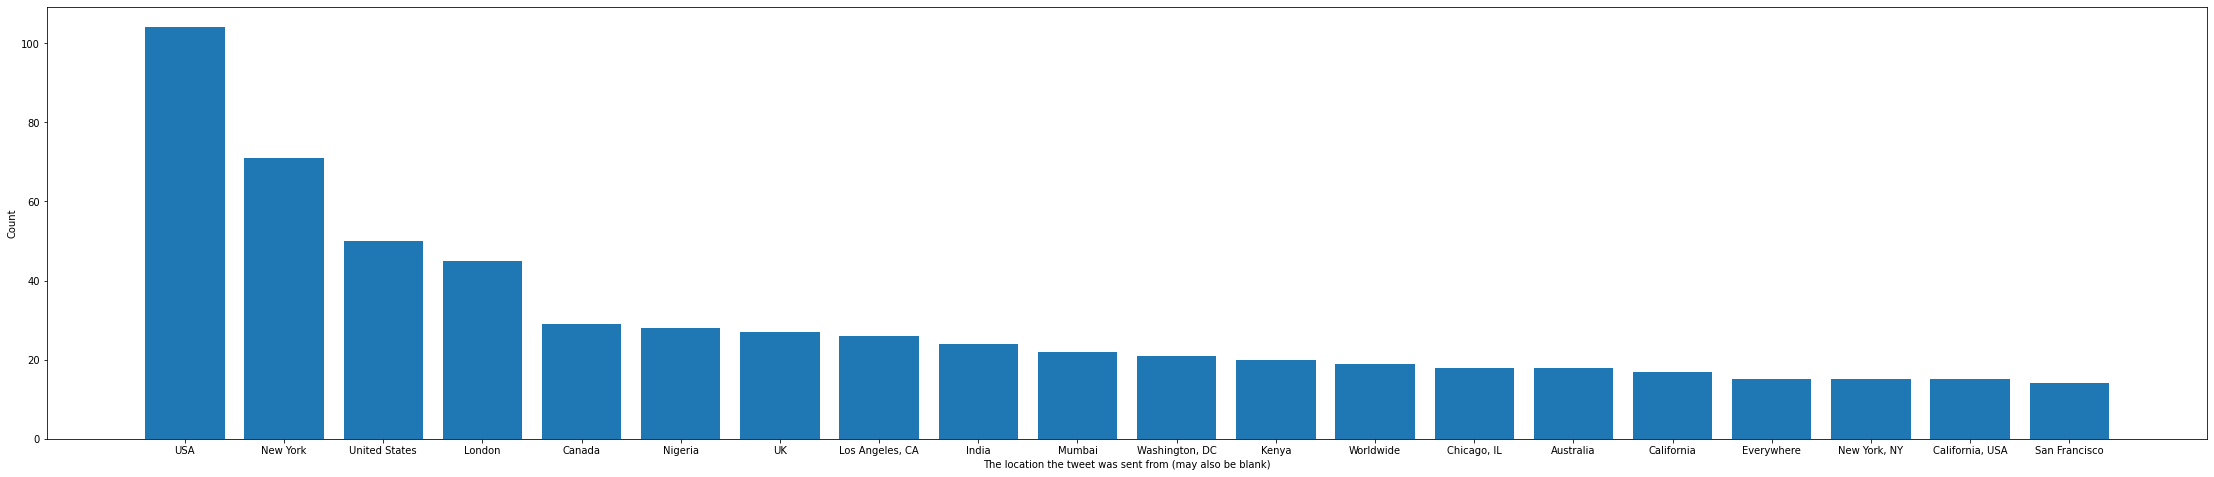

In [10]:
data=pd.DataFrame(train_df.groupby('location').count().id.sort_values(ascending=False)[:20]).reset_index()
fig=plt.figure(figsize=(30,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(data.location,data.id)
ax.set_ylabel('Count')
ax.set_xlabel('The location the tweet was sent from (may also be blank)')

<BarContainer object of 20 artists>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'The location the tweet was sent from (may also be blank)')

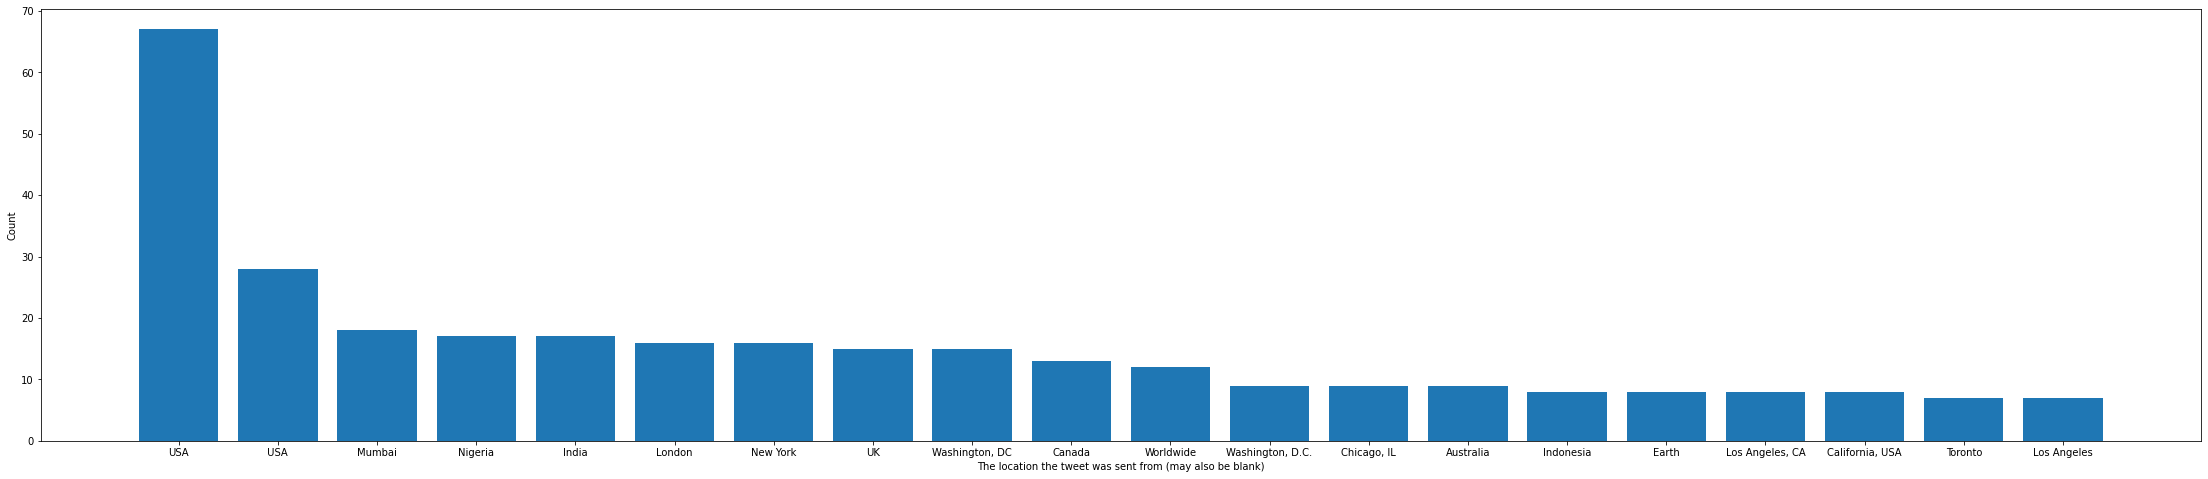

In [149]:
data=pd.DataFrame((train_df[(train_df['target']==1) & 
                            (train_df['location']!='None')]).groupby('location').count().id.sort_values(ascending=False)[:20]).reset_index()
fig=plt.figure(figsize=(30,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(data.location,data.id)
ax.set_ylabel('Count')
ax.set_xlabel('The location the tweet was sent from (may also be blank)')

<BarContainer object of 20 artists>

Text(0, 0.5, 'Count')

Text(0.5, 0, 'The location the tweet was sent from (may also be blank)')

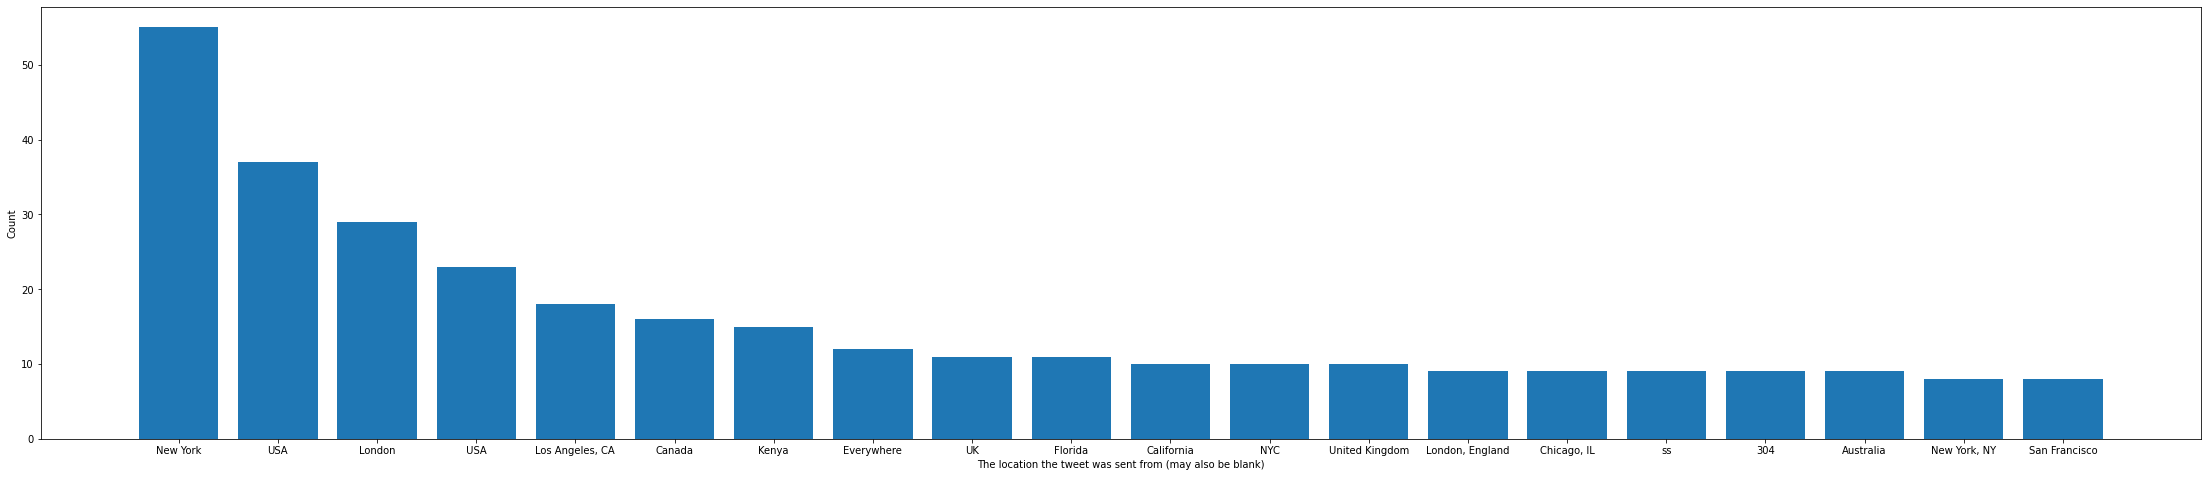

In [150]:
data=pd.DataFrame((train_df[(train_df['target']==0) & 
                            (train_df['location']!='None')]).groupby('location').count().id.sort_values(ascending=False)[:20]).reset_index()
fig=plt.figure(figsize=(30,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(data.location,data.id)
ax.set_ylabel('Count')
ax.set_xlabel('The location the tweet was sent from (may also be blank)')

the average words of twitter text ranges between 2.5 and 17.5 words, heavy concentraion around 4-8 words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

{'the': 2536,
 'a': 1810,
 'to': 1783,
 'in': 1724,
 'of': 1679,
 'and': 1279,
 'is': 792,
 'on': 758,
 'that': 484,
 'by': 460,
 'from': 360,
 'are': 336,
 'this': 332,
 'as': 278,
 'so': 235,
 'an': 203,
 'or': 179,
 'all': 176,
 'into': 155,
 'can': 139,
 'now': 101,
 'our': 72,
 'being': 67,
 'other': 31,
 'both': 20}

<Figure size 1008x432 with 0 Axes>

<BarContainer object of 25 artists>

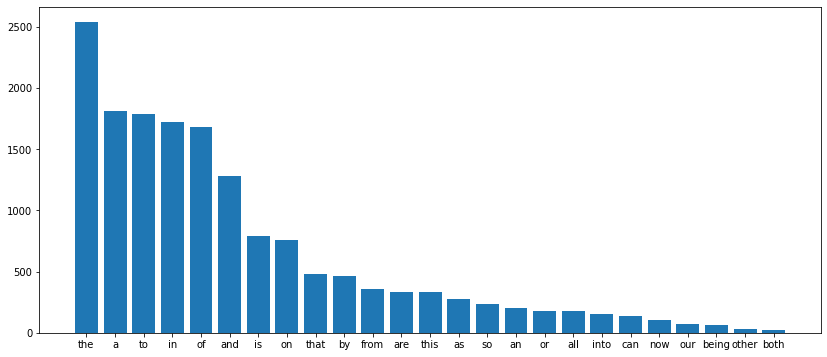



--- 0.8347988128662109 seconds ---


In [151]:
# Analyzing the amount and the types of stopwords for good insights into the data

# start time to measure the time of the program execution
start_time = time.time()

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

corpus=[]
new= train_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

# slice & sort by values dictionary before plot
import itertools
import operator

dic_sliced = dict(itertools.islice(dic.items(), 25))
dic_sorted = dict( sorted(dic_sliced.items(), key=operator.itemgetter(1), reverse=True))
dic_sorted

# plot bar graph
# function to add value labels
#def addlabels(x,y):
#    for i in range(len(x)):
#        plt.text(i, y[i], y[i], ha = 'center')
        
plt.figure(figsize=(14, 6))
plt.bar(dic_sorted.keys(), dic_sorted.values())
# calling the function to add value labels
#addlabels(dic_sorted.keys(), dic_sorted.values())
plt.show()        
# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[Text(0, 0, '328'),
 Text(0, 0, '299'),
 Text(0, 0, '225'),
 Text(0, 0, '198'),
 Text(0, 0, '198'),
 Text(0, 0, '194'),
 Text(0, 0, '187'),
 Text(0, 0, '178'),
 Text(0, 0, '176'),
 Text(0, 0, '155'),
 Text(0, 0, '152'),
 Text(0, 0, '152'),
 Text(0, 0, '152'),
 Text(0, 0, '144'),
 Text(0, 0, '135'),
 Text(0, 0, '131'),
 Text(0, 0, '130'),
 Text(0, 0, '130'),
 Text(0, 0, '128'),
 Text(0, 0, '125'),
 Text(0, 0, '122'),
 Text(0, 0, '119'),
 Text(0, 0, '119'),
 Text(0, 0, '119'),
 Text(0, 0, '119'),
 Text(0, 0, '118'),
 Text(0, 0, '117'),
 Text(0, 0, '112'),
 Text(0, 0, '112'),
 Text(0, 0, '111'),
 Text(0, 0, '110'),
 Text(0, 0, '108'),
 Text(0, 0, '108'),
 Text(0, 0, '108'),
 Text(0, 0, '107'),
 Text(0, 0, '107'),
 Text(0, 0, '106'),
 Text(0, 0, '106'),
 Text(0, 0, '104'),
 Text(0, 0, '104'),
 Text(0, 0, '103'),
 Text(0, 0, '103'),
 Text(0, 0, '101'),
 Text(0, 0, '99'),
 Text(0, 0, '98'),
 Text(0, 0, '98'),
 Text(0, 0, '97'),
 Text(0, 0, '97'),
 Text(0, 0, '96'),
 Text(0, 0, '94')]



--- 1.1521599292755127 seconds ---


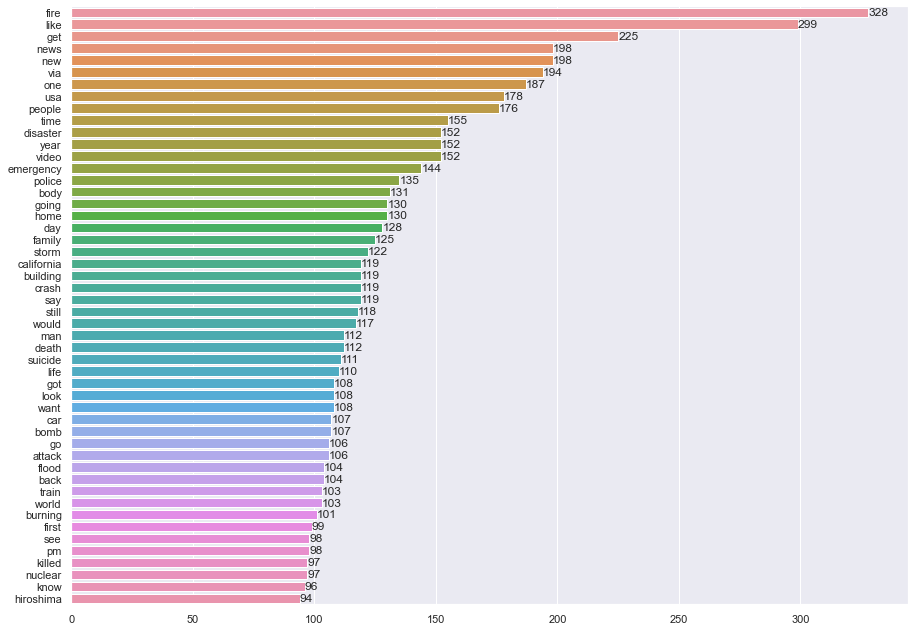

In [84]:
# count the most frequent words other than stop words

# start time to measure the time of the program execution
start_time = time.time()

# Converting to Lowercase
#corpus = [char.lower() for char in corpus]

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

import collections
from collections import Counter

corpus2=[]
new= rtrain_df['text_preprocessed_2nd'].str.split()
new=new.values.tolist()
corpus2=[word for i in new for word in i]

counter=Counter(corpus2)
most=counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.set(rc={'figure.figsize':(15,11)})
ax = sns.barplot(x=y,y=x)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[Text(0, 0, '263'),
 Text(0, 0, '146'),
 Text(0, 0, '119'),
 Text(0, 0, '117'),
 Text(0, 0, '114'),
 Text(0, 0, '108'),
 Text(0, 0, '108'),
 Text(0, 0, '106'),
 Text(0, 0, '103'),
 Text(0, 0, '103'),
 Text(0, 0, '102'),
 Text(0, 0, '95'),
 Text(0, 0, '95'),
 Text(0, 0, '93'),
 Text(0, 0, '93'),
 Text(0, 0, '93'),
 Text(0, 0, '92'),
 Text(0, 0, '90'),
 Text(0, 0, '88'),
 Text(0, 0, '87'),
 Text(0, 0, '84'),
 Text(0, 0, '81'),
 Text(0, 0, '79'),
 Text(0, 0, '78'),
 Text(0, 0, '77'),
 Text(0, 0, '74'),
 Text(0, 0, '74'),
 Text(0, 0, '73'),
 Text(0, 0, '73'),
 Text(0, 0, '72'),
 Text(0, 0, '71'),
 Text(0, 0, '71'),
 Text(0, 0, '70'),
 Text(0, 0, '70'),
 Text(0, 0, '69'),
 Text(0, 0, '67'),
 Text(0, 0, '67'),
 Text(0, 0, '63'),
 Text(0, 0, '61'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '58'),
 Text(0, 0, '56'),
 Text(0, 0, '56'),
 Text(0, 0, '56'),
 Text(0, 0, '55'),
 Text(0, 0, '55'),
 Text(0, 0, '55'),
 Text(0, 0, '55'),
 Text(0, 0, '55')]



--- 0.5067739486694336 seconds ---


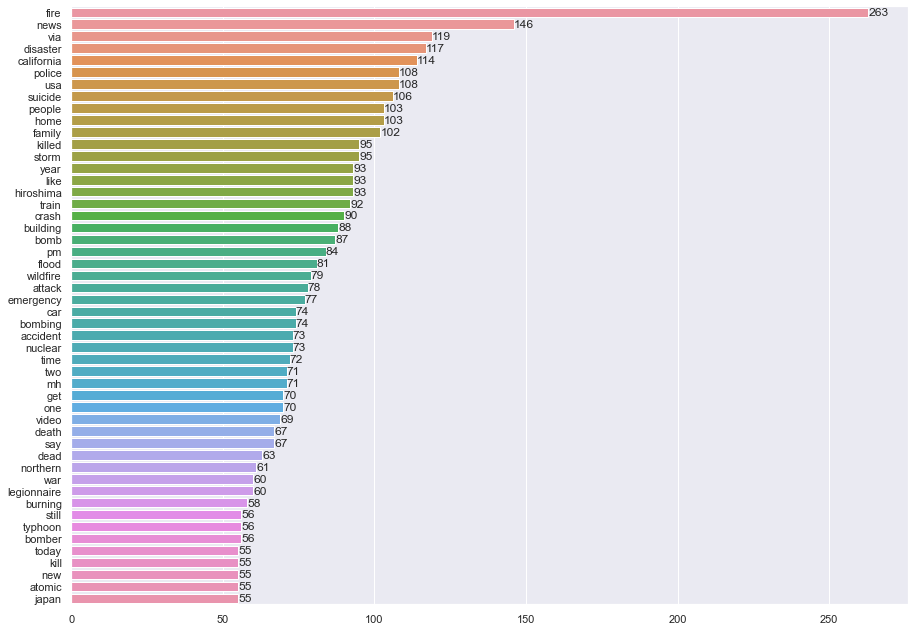

In [85]:
# count the most frequent words other than stop words
# for Disaster related tweets | Target = 1

# start time to measure the time of the program execution
start_time = time.time()

# Converting to Lowercase
#corpus = [char.lower() for char in corpus]

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

import collections
from collections import Counter

plot_df = rtrain_df[rtrain_df['target'] == 1]

corpus2=[]
new= plot_df['text_preprocessed_2nd'].str.split()
new=new.values.tolist()
corpus2=[word for i in new for word in i]

counter=Counter(corpus2)
most1=counter.most_common()

x, y= [], []
for word,count in most1[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.set(rc={'figure.figsize':(15,11)})
ax = sns.barplot(x=y,y=x)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[Text(0, 0, '206'),
 Text(0, 0, '155'),
 Text(0, 0, '143'),
 Text(0, 0, '117'),
 Text(0, 0, '98'),
 Text(0, 0, '90'),
 Text(0, 0, '89'),
 Text(0, 0, '83'),
 Text(0, 0, '83'),
 Text(0, 0, '82'),
 Text(0, 0, '81'),
 Text(0, 0, '76'),
 Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '73'),
 Text(0, 0, '72'),
 Text(0, 0, '71'),
 Text(0, 0, '70'),
 Text(0, 0, '70'),
 Text(0, 0, '69'),
 Text(0, 0, '69'),
 Text(0, 0, '68'),
 Text(0, 0, '67'),
 Text(0, 0, '67'),
 Text(0, 0, '65'),
 Text(0, 0, '63'),
 Text(0, 0, '62'),
 Text(0, 0, '61'),
 Text(0, 0, '61'),
 Text(0, 0, '60'),
 Text(0, 0, '60'),
 Text(0, 0, '59'),
 Text(0, 0, '58'),
 Text(0, 0, '57'),
 Text(0, 0, '57'),
 Text(0, 0, '56'),
 Text(0, 0, '55'),
 Text(0, 0, '54'),
 Text(0, 0, '53'),
 Text(0, 0, '52'),
 Text(0, 0, '52'),
 Text(0, 0, '49'),
 Text(0, 0, '48'),
 Text(0, 0, '46'),
 Text(0, 0, '45'),
 Text(0, 0, '45'),
 Text(0, 0, '44'),
 Text(0, 0, '44'),
 Text(0, 0, '44')]



--- 6.412319660186768 seconds ---


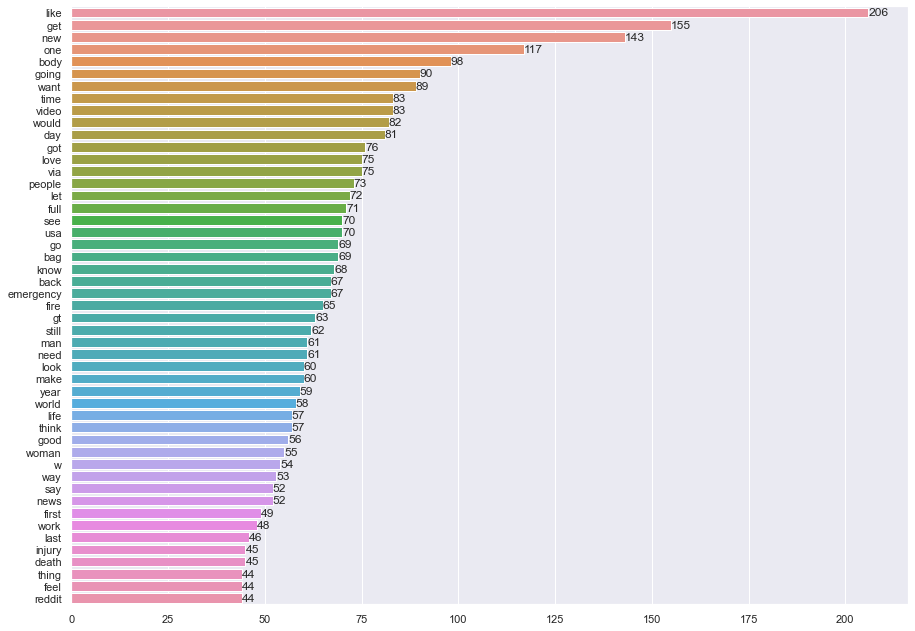

In [86]:
# count the most frequent words other than stop words
# for Non-Disaster related tweets | Target = 0

# start time to measure the time of the program execution
start_time = time.time()

# Converting to Lowercase
#corpus = [char.lower() for char in corpus]

import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

import collections
from collections import Counter

plot_df2 = rtrain_df[rtrain_df['target'] == 0]

corpus2=[]
new= plot_df2['text_preprocessed_2nd'].str.split()
new=new.values.tolist()
corpus2=[word for i in new for word in i]

counter=Counter(corpus2)
most2=counter.most_common()

x, y= [], []
for word,count in most2[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.set(rc={'figure.figsize':(15,11)})
ax = sns.barplot(x=y,y=x)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '328'),
 Text(0, 0, '299'),
 Text(0, 0, '225'),
 Text(0, 0, '198'),
 Text(0, 0, '198'),
 Text(0, 0, '194'),
 Text(0, 0, '187'),
 Text(0, 0, '178'),
 Text(0, 0, '176'),
 Text(0, 0, '155')]



--- 0.09182000160217285 seconds ---


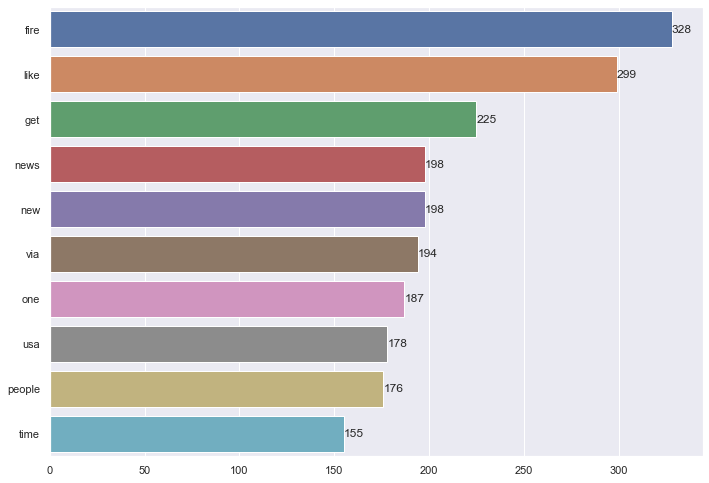

In [87]:
# count the most frequent words other than stop words

# start time to measure the time of the program execution
start_time = time.time()

x1, y1= [], []
for word,count in most[:10]:
    if (word not in stop):
        x1.append(word)
        y1.append(count)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=y1,y=x1)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '263'),
 Text(0, 0, '146'),
 Text(0, 0, '119'),
 Text(0, 0, '117'),
 Text(0, 0, '114'),
 Text(0, 0, '108'),
 Text(0, 0, '108'),
 Text(0, 0, '106'),
 Text(0, 0, '103'),
 Text(0, 0, '103')]



--- 0.10481595993041992 seconds ---


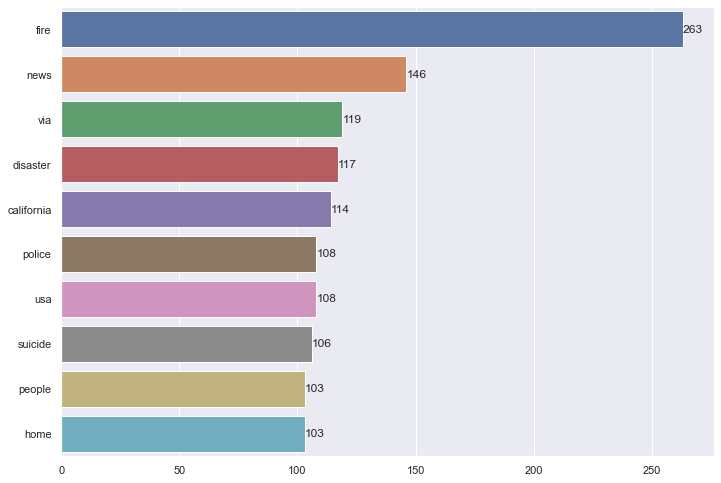

In [88]:
# count the most frequent words other than stop words
# for Disaster related tweets | Target = 1

# start time to measure the time of the program execution
start_time = time.time()

x1, y1= [], []
for word,count in most1[:10]:
    if (word not in stop):
        x1.append(word)
        y1.append(count)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=y1,y=x1)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[Text(0, 0, '206'),
 Text(0, 0, '155'),
 Text(0, 0, '143'),
 Text(0, 0, '117'),
 Text(0, 0, '98'),
 Text(0, 0, '90'),
 Text(0, 0, '89'),
 Text(0, 0, '83'),
 Text(0, 0, '83'),
 Text(0, 0, '82')]



--- 0.14362001419067383 seconds ---


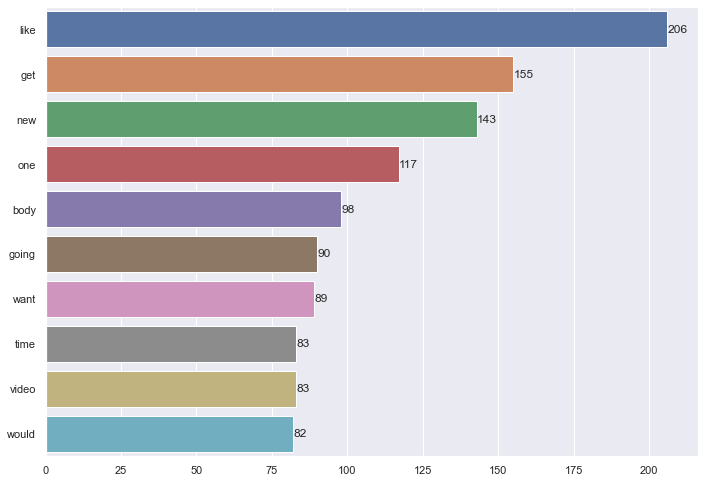

In [89]:
# count the most frequent words other than stop words
# for Non-Disaster related tweets | Target = 0

# start time to measure the time of the program execution
start_time = time.time()

x1, y1= [], []
for word,count in most2[:10]:
    if (word not in stop):
        x1.append(word)
        y1.append(count)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=y1,y=x1)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __n_grams Analysis__

In [93]:
# start time to measure the time of the program execution
start_time = time.time()

#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.0042247772216796875 seconds ---


#### (a) bi-grams

In [99]:
# start time to measure the time of the program execution - Entire Corpus
start_time = time.time()

#n2_bigram
n2_bigrams = get_top_n_gram(rtrain_df['text_preprocessed_2nd'], (2,2), 50)
n2_bigrams

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[('suicide bomber', 55),
 ('look like', 46),
 ('burning building', 46),
 ('body bag', 42),
 ('northern california', 41),
 ('oil spill', 39),
 ('liked video', 36),
 ('suicide bombing', 35),
 ('california wildfire', 35),
 ('cross body', 33),
 ('mass murder', 32),
 ('heat wave', 31),
 ('natural disaster', 30),
 ('mass murderer', 30),
 ('home razed', 29),
 ('severe thunderstorm', 28),
 ('latest home', 28),
 ('razed northern', 28),
 ('gt gt', 27),
 ('confirmed mh', 27),
 ('atomic bomb', 26),
 ('feel like', 26),
 ('emergency service', 25),
 ('yr old', 25),
 ('dust storm', 25),
 ('family sue', 25),
 ('sue legionnaire', 25),
 ('family affected', 25),
 ('affected fatal', 25),
 ('fatal outbreak', 25),
 ('outbreak legionnaire', 25),
 ('bomber detonated', 25),
 ('mh malaysia', 24),
 ('obama declares', 24),
 ('thunderstorm warning', 24),
 ('prebreak best', 24),
 ('legionnaire family', 24),
 ('police officer', 24),
 ('watch airport', 24),
 ('airport swallowed', 24),
 ('swallowed sandstorm', 24),
 ('



--- 0.5546119213104248 seconds ---


In [97]:
# start time to measure the time of the program execution - disaster tweets
start_time = time.time()

#n2_bigram
disaster_df = rtrain_df[rtrain_df['target'] == 1]
n2_bigrams_d = get_top_n_gram(disaster_df['text_preprocessed_2nd'], (2,2), 50)
n2_bigrams_d

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[('suicide bomber', 55),
 ('northern california', 41),
 ('oil spill', 38),
 ('california wildfire', 35),
 ('suicide bombing', 34),
 ('burning building', 31),
 ('home razed', 29),
 ('severe thunderstorm', 28),
 ('latest home', 28),
 ('razed northern', 28),
 ('confirmed mh', 27),
 ('mass murder', 27),
 ('atomic bomb', 25),
 ('family sue', 25),
 ('sue legionnaire', 25),
 ('family affected', 25),
 ('affected fatal', 25),
 ('fatal outbreak', 25),
 ('outbreak legionnaire', 25),
 ('bomber detonated', 25),
 ('mh malaysia', 24),
 ('obama declares', 24),
 ('thunderstorm warning', 24),
 ('yr old', 24),
 ('legionnaire family', 24),
 ('watch airport', 24),
 ('airport swallowed', 24),
 ('swallowed sandstorm', 24),
 ('sandstorm minute', 24),
 ('heat wave', 23),
 ('declares disaster', 23),
 ('disaster typhoon', 23),
 ('typhoon devastated', 23),
 ('devastated saipan', 23),
 ('pkk suicide', 23),
 ('detonated bomb', 23),
 ('wreckage conclusively', 23),
 ('conclusively confirmed', 23),
 ('malaysia pm', 23



--- 0.34218454360961914 seconds ---


In [106]:
n2_bigrams_d[0][1]

55

[Text(0, 0, '55'),
 Text(0, 0, '41'),
 Text(0, 0, '38'),
 Text(0, 0, '35'),
 Text(0, 0, '34'),
 Text(0, 0, '31'),
 Text(0, 0, '29'),
 Text(0, 0, '28'),
 Text(0, 0, '28'),
 Text(0, 0, '28'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '25')]



--- 0.1299290657043457 seconds ---


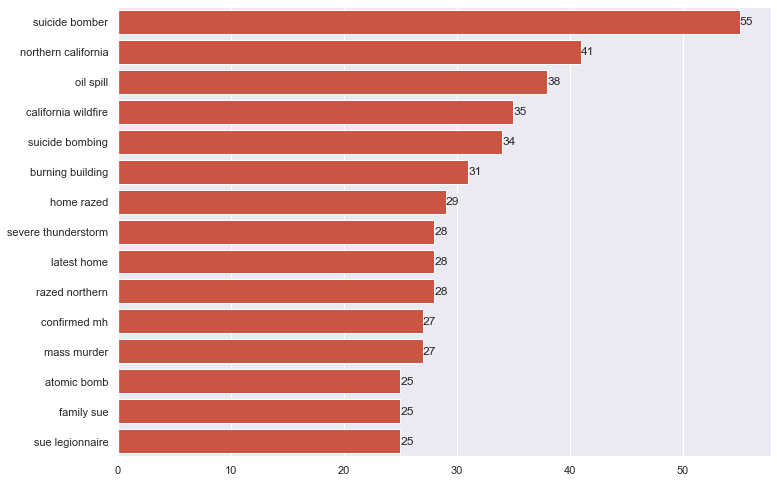

In [114]:
# Visualize - disaster tweets

# start time to measure the time of the program execution - disaster tweets
start_time = time.time()

#n2_bigram
#bigrams_d = []
#bi_values_d = []
#for item in n2_bigrams_d:
#    bigrams_d.append(item[0])
#    bi_values_d.append(item[1])

#bi_grams_d_df = pd.DataFrame({'bi_grams': bigrams_d, 'values': bi_values_d})
#bi_grams_d_df

# bar plot
xd, yd= [], []
for word,count in n2_bigrams_d[:15]:
    xd.append(word)
    yd.append(count)

cmap_redd = plt.cm.get_cmap('OrRd')
redd = cmap_redd(0.7)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=yd,y=xd, color=redd)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [98]:
# start time to measure the time of the program execution - non-disaster tweets
start_time = time.time()

#n2_bigram
nodisaster_df = rtrain_df[rtrain_df['target'] == 0]
n2_bigrams_n = get_top_n_gram(nodisaster_df['text_preprocessed_2nd'], (2,2), 50)
n2_bigrams_n

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[('body bag', 40),
 ('cross body', 32),
 ('look like', 29),
 ('liked video', 29),
 ('gt gt', 25),
 ('feel like', 21),
 ('reddit quarantine', 19),
 ('quarantine offensive', 19),
 ('offensive content', 19),
 ('body bagging', 18),
 ('emergency service', 15),
 ('burning building', 15),
 ('loud bang', 15),
 ('content policy', 15),
 ('china stock', 15),
 ('stock market', 15),
 ('market crash', 15),
 ('fall cliff', 14),
 ('ignition knock', 14),
 ('knock detonation', 14),
 ('detonation sensor', 14),
 ('laughing loud', 13),
 ('read ebay', 13),
 ('war zone', 13),
 ('wreck wreck', 13),
 ('pick fan', 12),
 ('fan army', 12),
 ('added video', 11),
 ('video playlist', 11),
 ('faux leather', 11),
 ('led work', 11),
 ('prebreak best', 11),
 ('mass murderer', 11),
 ('reddit new', 11),
 ('new content', 11),
 ('banned quarantined', 11),
 ('hollywood movie', 11),
 ('movie trapped', 11),
 ('trapped miner', 11),
 ('lady shoulder', 10),
 ('shoulder tote', 10),
 ('desolation smaug', 10),
 ('work light', 10),
 



--- 0.26111936569213867 seconds ---


[Text(0, 0, '40'),
 Text(0, 0, '32'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '25'),
 Text(0, 0, '21'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15')]



--- 0.1672985553741455 seconds ---


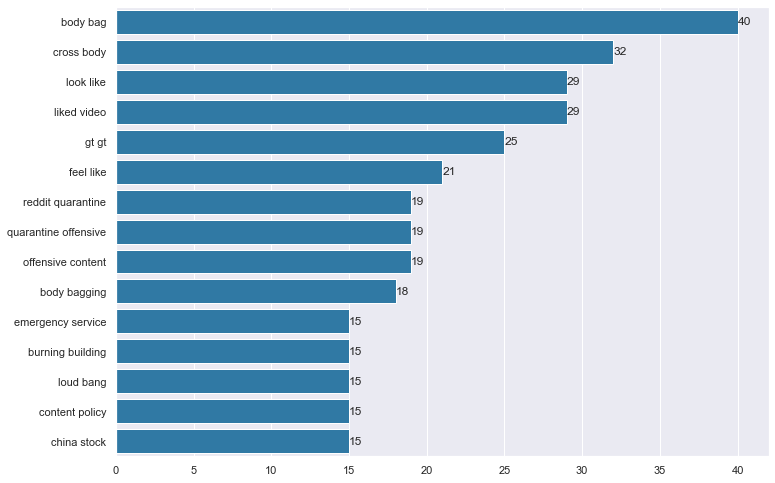

In [112]:
# Visualize - non-disaster tweets

# start time to measure the time of the program execution
start_time = time.time()

# bar plot
xn, yn= [], []
for word,count in n2_bigrams_n[:15]:
    xn.append(word)
    yn.append(count)

cmap_blued = plt.cm.get_cmap('GnBu')
blued = cmap_blued(0.8)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=yn,y=xn, color=blued)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### (b) tri-grams

In [100]:
# start time to measure the time of the program execution - Entire Corpus
start_time = time.time()

#n2_bigram
n3_trigrams = get_top_n_gram(rtrain_df['text_preprocessed_2nd'], (3,3), 50)
n3_trigrams

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[('northern california wildfire', 29),
 ('latest home razed', 28),
 ('home razed northern', 28),
 ('razed northern california', 27),
 ('family sue legionnaire', 25),
 ('family affected fatal', 25),
 ('affected fatal outbreak', 25),
 ('suicide bomber detonated', 25),
 ('severe thunderstorm warning', 24),
 ('sue legionnaire family', 24),
 ('legionnaire family affected', 24),
 ('watch airport swallowed', 24),
 ('airport swallowed sandstorm', 24),
 ('swallowed sandstorm minute', 24),
 ('obama declares disaster', 23),
 ('declares disaster typhoon', 23),
 ('disaster typhoon devastated', 23),
 ('typhoon devastated saipan', 23),
 ('pkk suicide bomber', 23),
 ('bomber detonated bomb', 23),
 ('wreckage conclusively confirmed', 23),
 ('cross body bag', 22),
 ('refugio oil spill', 22),
 ('oil spill costlier', 22),
 ('spill costlier bigger', 22),
 ('costlier bigger projected', 22),
 ('fatal outbreak legionnaire', 22),
 ('reddit quarantine offensive', 22),
 ('quarantine offensive content', 22),
 ('c



--- 0.5226578712463379 seconds ---


In [101]:
# start time to measure the time of the program execution - disaster tweets
start_time = time.time()

#n2_bigram
disaster_df = rtrain_df[rtrain_df['target'] == 1]
n3_trigrams_d = get_top_n_gram(disaster_df['text_preprocessed_2nd'], (3,3), 50)
n3_trigrams_d

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[('northern california wildfire', 29),
 ('latest home razed', 28),
 ('home razed northern', 28),
 ('razed northern california', 27),
 ('family sue legionnaire', 25),
 ('family affected fatal', 25),
 ('affected fatal outbreak', 25),
 ('suicide bomber detonated', 25),
 ('severe thunderstorm warning', 24),
 ('sue legionnaire family', 24),
 ('legionnaire family affected', 24),
 ('watch airport swallowed', 24),
 ('airport swallowed sandstorm', 24),
 ('swallowed sandstorm minute', 24),
 ('obama declares disaster', 23),
 ('declares disaster typhoon', 23),
 ('disaster typhoon devastated', 23),
 ('typhoon devastated saipan', 23),
 ('pkk suicide bomber', 23),
 ('bomber detonated bomb', 23),
 ('wreckage conclusively confirmed', 23),
 ('refugio oil spill', 22),
 ('oil spill costlier', 22),
 ('spill costlier bigger', 22),
 ('costlier bigger projected', 22),
 ('fatal outbreak legionnaire', 22),
 ('yr old pkk', 22),
 ('old pkk suicide', 22),
 ('detonated bomb turkey', 22),
 ('bomb turkey army', 22),




--- 0.27852630615234375 seconds ---


[Text(0, 0, '29'),
 Text(0, 0, '28'),
 Text(0, 0, '28'),
 Text(0, 0, '27'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '23')]



--- 0.14408469200134277 seconds ---


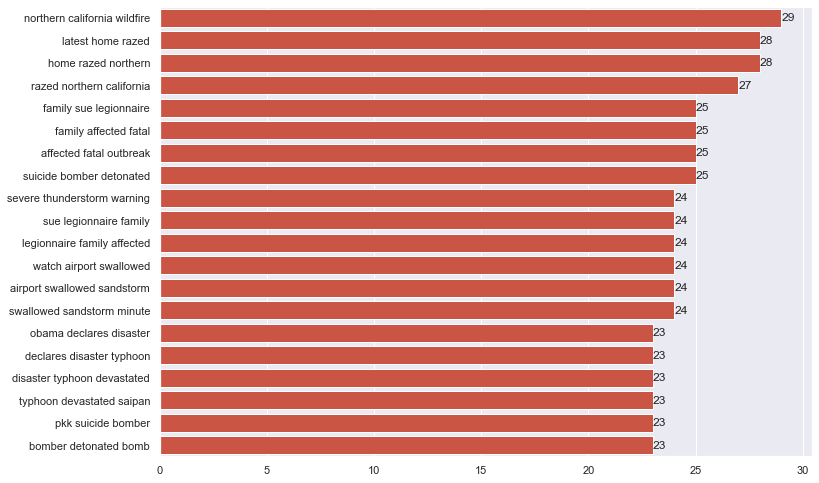

In [116]:
# Visualize - disaster tweets

# start time to measure the time of the program execution - disaster tweets
start_time = time.time()

# bar plot
xd3, yd3= [], []
for word,count in n3_trigrams_d[:20]:
    xd3.append(word)
    yd3.append(count)

cmap_redd = plt.cm.get_cmap('OrRd')
redd = cmap_redd(0.7)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=yd3,y=xd3, color=redd)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [102]:
# start time to measure the time of the program execution - non-disaster tweets
start_time = time.time()

#n2_bigram
nodisaster_df = rtrain_df[rtrain_df['target'] == 0]
n3_trigrams_n = get_top_n_gram(nodisaster_df['text_preprocessed_2nd'], (3,3), 50)
n3_trigrams_n

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[('cross body bag', 21),
 ('reddit quarantine offensive', 19),
 ('quarantine offensive content', 19),
 ('china stock market', 15),
 ('stock market crash', 15),
 ('ignition knock detonation', 14),
 ('knock detonation sensor', 14),
 ('gt gt gt', 13),
 ('pick fan army', 12),
 ('added video playlist', 11),
 ('reddit new content', 11),
 ('new content policy', 11),
 ('hollywood movie trapped', 11),
 ('movie trapped miner', 11),
 ('wreck wreck wreck', 11),
 ('lady shoulder tote', 10),
 ('led work light', 10),
 ('breaking news unconfirmed', 10),
 ('news unconfirmed heard', 10),
 ('unconfirmed heard loud', 10),
 ('heard loud bang', 10),
 ('loud bang nearby', 10),
 ('bang nearby appears', 10),
 ('nearby appears blast', 10),
 ('appears blast wind', 10),
 ('blast wind neighbour', 10),
 ('content policy effect', 10),
 ('policy effect horrible', 10),
 ('effect horrible subreddits', 10),
 ('horrible subreddits banned', 10),
 ('subreddits banned quarantined', 10),
 ('new lady shoulder', 9),
 ('shoulde



--- 0.37349605560302734 seconds ---


[Text(0, 0, '21'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10')]



--- 0.16290044784545898 seconds ---


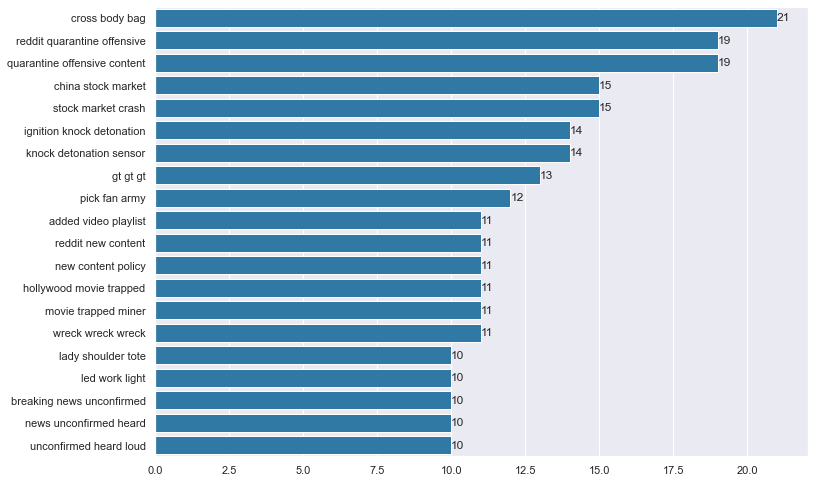

In [117]:
# Visualize - non-disaster tweets

# start time to measure the time of the program execution
start_time = time.time()

# bar plot
xn3, yn3= [], []
for word,count in n3_trigrams_n[:20]:
    xn3.append(word)
    yn3.append(count)

cmap_blued = plt.cm.get_cmap('GnBu')
blued = cmap_blued(0.8)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=yn3,y=xn3, color=blued)
ax.bar_label(ax.containers[0])

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

----------------------------------------
#### __Word Cloud__

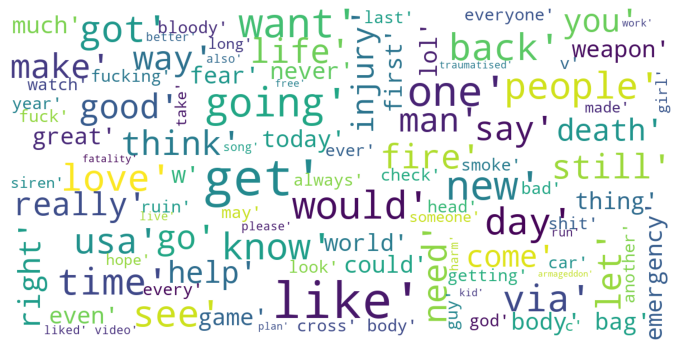



--- 3.040008544921875 seconds ---


In [158]:
# wordcloud - 'text_preprocessed_2nd' - ALL

# start time to measure the time of the program execution
start_time = time.time()

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus2)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,wholesale market ablaze,wholesale market ablaze
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,always try bring heavy metal rt,always try bring heavy metal
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking news nigeria flag set abl...,africanbaze breaking news nigeria flag set abl...
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cry set ablaze,cry set ablaze
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaze,plus side look sky last night ablaze
...,...,...,...,...,...,...,...
7473,10830,wrecked,None,@jt_ruff23 @cameronhacker and I wrecked you both,0,wrecked,wrecked
7474,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,three day work pretty much wrecked hahaha shou...,three day work pretty much wrecked hahaha shou...
7475,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,fx forex trading cramer iger word wrecked disn...,fx forex trading cramer iger word wrecked disn...
7476,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,great atmosphere british lion gig tonight hear...,great atmosphere british lion gig tonight hear...


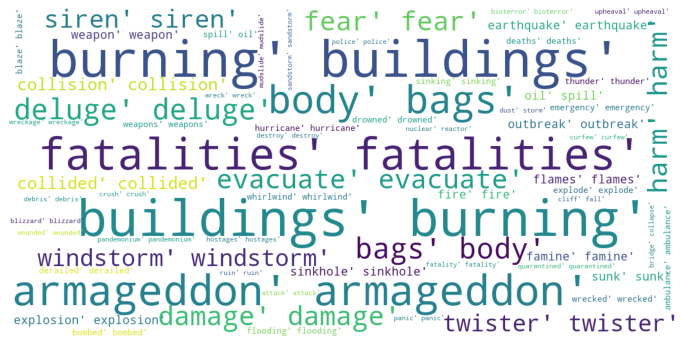



--- 1.5750486850738525 seconds ---


In [159]:
# wordcloud - with 'keywords'

# start time to measure the time of the program execution
start_time = time.time()

# Create copied dataframe and extract rows with missing 'keywords' to be dropped
wordcloud_df = train_df.copy()
drop_data = wordcloud_df[wordcloud_df['keyword'] == 'None']

# Keep only those rows that are not in 'drio_data' dataframe
wordcloud_df = wordcloud_df[~wordcloud_df.id.isin(drop_data.id.tolist())]
wordcloud_df

corpus3=[]
new3= wordcloud_df['keyword'].str.split()
new3=new3.values.tolist()
corpus3=[word for i in new3 for word in i]

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [188]:
# Create an array from the image you want to use as a mask
## Your file path will look different
#fire_mask = np.array(Image.open('/content/fire_image.png'))

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive you,deed reason earthquake may allah forgive you
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
6698,10863,None,None,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines g link tram update...,worldnews fallen powerlines g link tram update...
6699,10864,None,None,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...,flip side walmart bomb everyone evacuate stay ...
6700,10866,None,None,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...,suicide bomber kill saudi security site mosque...
6701,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,two giant crane holding bridge collapse nearby...


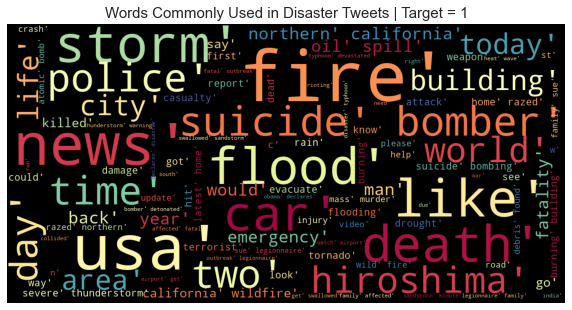



--- 4.059156179428101 seconds ---


In [90]:
# wordcloud - 'text_preprocessed_2nd' - with disaster tweets only (target = 1)

# start time to measure the time of the program execution
start_time = time.time()

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Define a list of stop words
stopwords = ["one'", "near'", "going'", "people'", "via'", 'line',
             "another'", "rd'", "mh'", "new'", "yr'"]

# Create copied dataframe and extract rows with missing 'keywords' to be dropped
wordcloud_df2 = rtrain_df.copy()
drop_data2 = wordcloud_df2[wordcloud_df2['target'] == 0]

# Keep only those rows that are not in 'drio_data' dataframe
wordcloud_df2 = wordcloud_df2[~wordcloud_df2.id.isin(drop_data2.id.tolist())]
wordcloud_df2

corpus4=[]
new4= wordcloud_df2['text_preprocessed_2nd'].str.split()
new4=new4.values.tolist()
corpus4=[word for i in new4 for word in i]

def show_wordcloud(data, title):
    wordcloud = WordCloud(
        #width=1000,
        #height=600,
        background_color='black',
        #max_words=100,
        max_font_size=50,
        colormap='Spectral',
        #mask=mask,
        scale=3,
        stopwords=stopwords,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.title(title, fontsize=15)
    plt.show()

title4 = 'Words Commonly Used in Disaster Tweets | Target = 1'
show_wordcloud(corpus4, title4)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
15,23,None,None,What's up man?,0,man,man
16,24,None,None,I love fruits,0,love fruit,love fruit
17,25,None,None,Summer is lovely,0,summer lovely,summer lovely
18,26,None,None,My car is so fast,0,car fast,car fast
19,28,None,None,What a goal,0,goal,goal
...,...,...,...,...,...,...,...
6676,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,fx forex trading cramer iger word wrecked disn...,fx forex trading cramer iger word wrecked disn...
6677,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,great atmosphere british lion gig tonight hear...,great atmosphere british lion gig tonight hear...
6678,10834,wrecked,None,Cramer: Iger's 3 words that wrecked Disney's s...,0,cramer iger word wrecked disney stock cnbc,cramer iger word wrecked disney stock cnbc
6680,10837,None,None,These boxes are ready to explode! Exploding Ki...,0,box ready explode exploding kitten finally arr...,box ready explode exploding kitten finally arr...


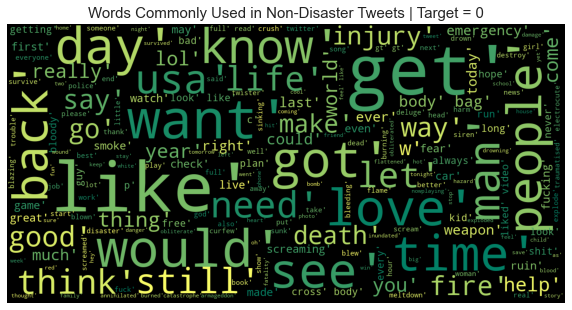



--- 5.351925373077393 seconds ---


In [91]:
# wordcloud - 'text_preprocessed_2nd' - non-disaster tweets (target = 0)

# start time to measure the time of the program execution
start_time = time.time()

#Define a list of stop words
stopwords = ["one'", "near'", "going'", "via'", 'line',
             "another'", "rd'", "mh'", "v'","new'", "yr'"]

# Create copied dataframe and extract rows with missing 'keywords' to be dropped
wordcloud_df3 = rtrain_df.copy()
drop_data3 = wordcloud_df3[wordcloud_df3['target'] == 1]

# Keep only those rows that are not in 'drio_data' dataframe
wordcloud_df3 = wordcloud_df3[~wordcloud_df3.id.isin(drop_data3.id.tolist())]
wordcloud_df3

corpus5=[]
new5= wordcloud_df3['text_preprocessed_2nd'].str.split()
new5=new5.values.tolist()
corpus5=[word for i in new5 for word in i]

def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='black',
        #max_words=100,
        max_font_size=50,
        colormap='summer',
        #mask=mask,
        scale=3,
        stopwords=stopwords,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.title(title, fontsize=15)
    plt.show()

title5 = 'Words Commonly Used in Non-Disaster Tweets | Target = 0'
show_wordcloud(corpus5, title5)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

---------------------------------------------

----------------------------------------------------------
#### __Distribution Plots for Various Counts__

In [162]:
# start time to measure the time of the program execution
start_time = time.time()

from wordcloud import STOPWORDS
import string

df_train = train_df.copy()
df_test = test_df.copy()

# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 1.6621127128601074 seconds ---


<AxesSubplot:xlabel='word_count', ylabel='Density'>

<AxesSubplot:xlabel='word_count', ylabel='Density'>

<AxesSubplot:xlabel='word_count', ylabel='Density'>

<AxesSubplot:xlabel='word_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'word_count Target Distribution in Training Set')

Text(0.5, 1.0, 'word_count Training & Test Set Distribution')

<AxesSubplot:xlabel='unique_word_count', ylabel='Density'>

<AxesSubplot:xlabel='unique_word_count', ylabel='Density'>

<AxesSubplot:xlabel='unique_word_count', ylabel='Density'>

<AxesSubplot:xlabel='unique_word_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'unique_word_count Target Distribution in Training Set')

Text(0.5, 1.0, 'unique_word_count Training & Test Set Distribution')

<AxesSubplot:xlabel='stop_word_count', ylabel='Density'>

<AxesSubplot:xlabel='stop_word_count', ylabel='Density'>

<AxesSubplot:xlabel='stop_word_count', ylabel='Density'>

<AxesSubplot:xlabel='stop_word_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'stop_word_count Target Distribution in Training Set')

Text(0.5, 1.0, 'stop_word_count Training & Test Set Distribution')

<AxesSubplot:xlabel='url_count', ylabel='Density'>

<AxesSubplot:xlabel='url_count', ylabel='Density'>

<AxesSubplot:xlabel='url_count', ylabel='Density'>

<AxesSubplot:xlabel='url_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'url_count Target Distribution in Training Set')

Text(0.5, 1.0, 'url_count Training & Test Set Distribution')

<AxesSubplot:xlabel='mean_word_length', ylabel='Density'>

<AxesSubplot:xlabel='mean_word_length', ylabel='Density'>

<AxesSubplot:xlabel='mean_word_length', ylabel='Density'>

<AxesSubplot:xlabel='mean_word_length', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'mean_word_length Target Distribution in Training Set')

Text(0.5, 1.0, 'mean_word_length Training & Test Set Distribution')

<AxesSubplot:xlabel='char_count', ylabel='Density'>

<AxesSubplot:xlabel='char_count', ylabel='Density'>

<AxesSubplot:xlabel='char_count', ylabel='Density'>

<AxesSubplot:xlabel='char_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'char_count Target Distribution in Training Set')

Text(0.5, 1.0, 'char_count Training & Test Set Distribution')

<AxesSubplot:xlabel='punctuation_count', ylabel='Density'>

<AxesSubplot:xlabel='punctuation_count', ylabel='Density'>

<AxesSubplot:xlabel='punctuation_count', ylabel='Density'>

<AxesSubplot:xlabel='punctuation_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'punctuation_count Target Distribution in Training Set')

Text(0.5, 1.0, 'punctuation_count Training & Test Set Distribution')

<AxesSubplot:xlabel='hashtag_count', ylabel='Density'>

<AxesSubplot:xlabel='hashtag_count', ylabel='Density'>

<AxesSubplot:xlabel='hashtag_count', ylabel='Density'>

<AxesSubplot:xlabel='hashtag_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'hashtag_count Target Distribution in Training Set')

Text(0.5, 1.0, 'hashtag_count Training & Test Set Distribution')

<AxesSubplot:xlabel='mention_count', ylabel='Density'>

<AxesSubplot:xlabel='mention_count', ylabel='Density'>

<AxesSubplot:xlabel='mention_count', ylabel='Density'>

<AxesSubplot:xlabel='mention_count', ylabel='Density'>

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'mention_count Target Distribution in Training Set')

Text(0.5, 1.0, 'mention_count Training & Test Set Distribution')

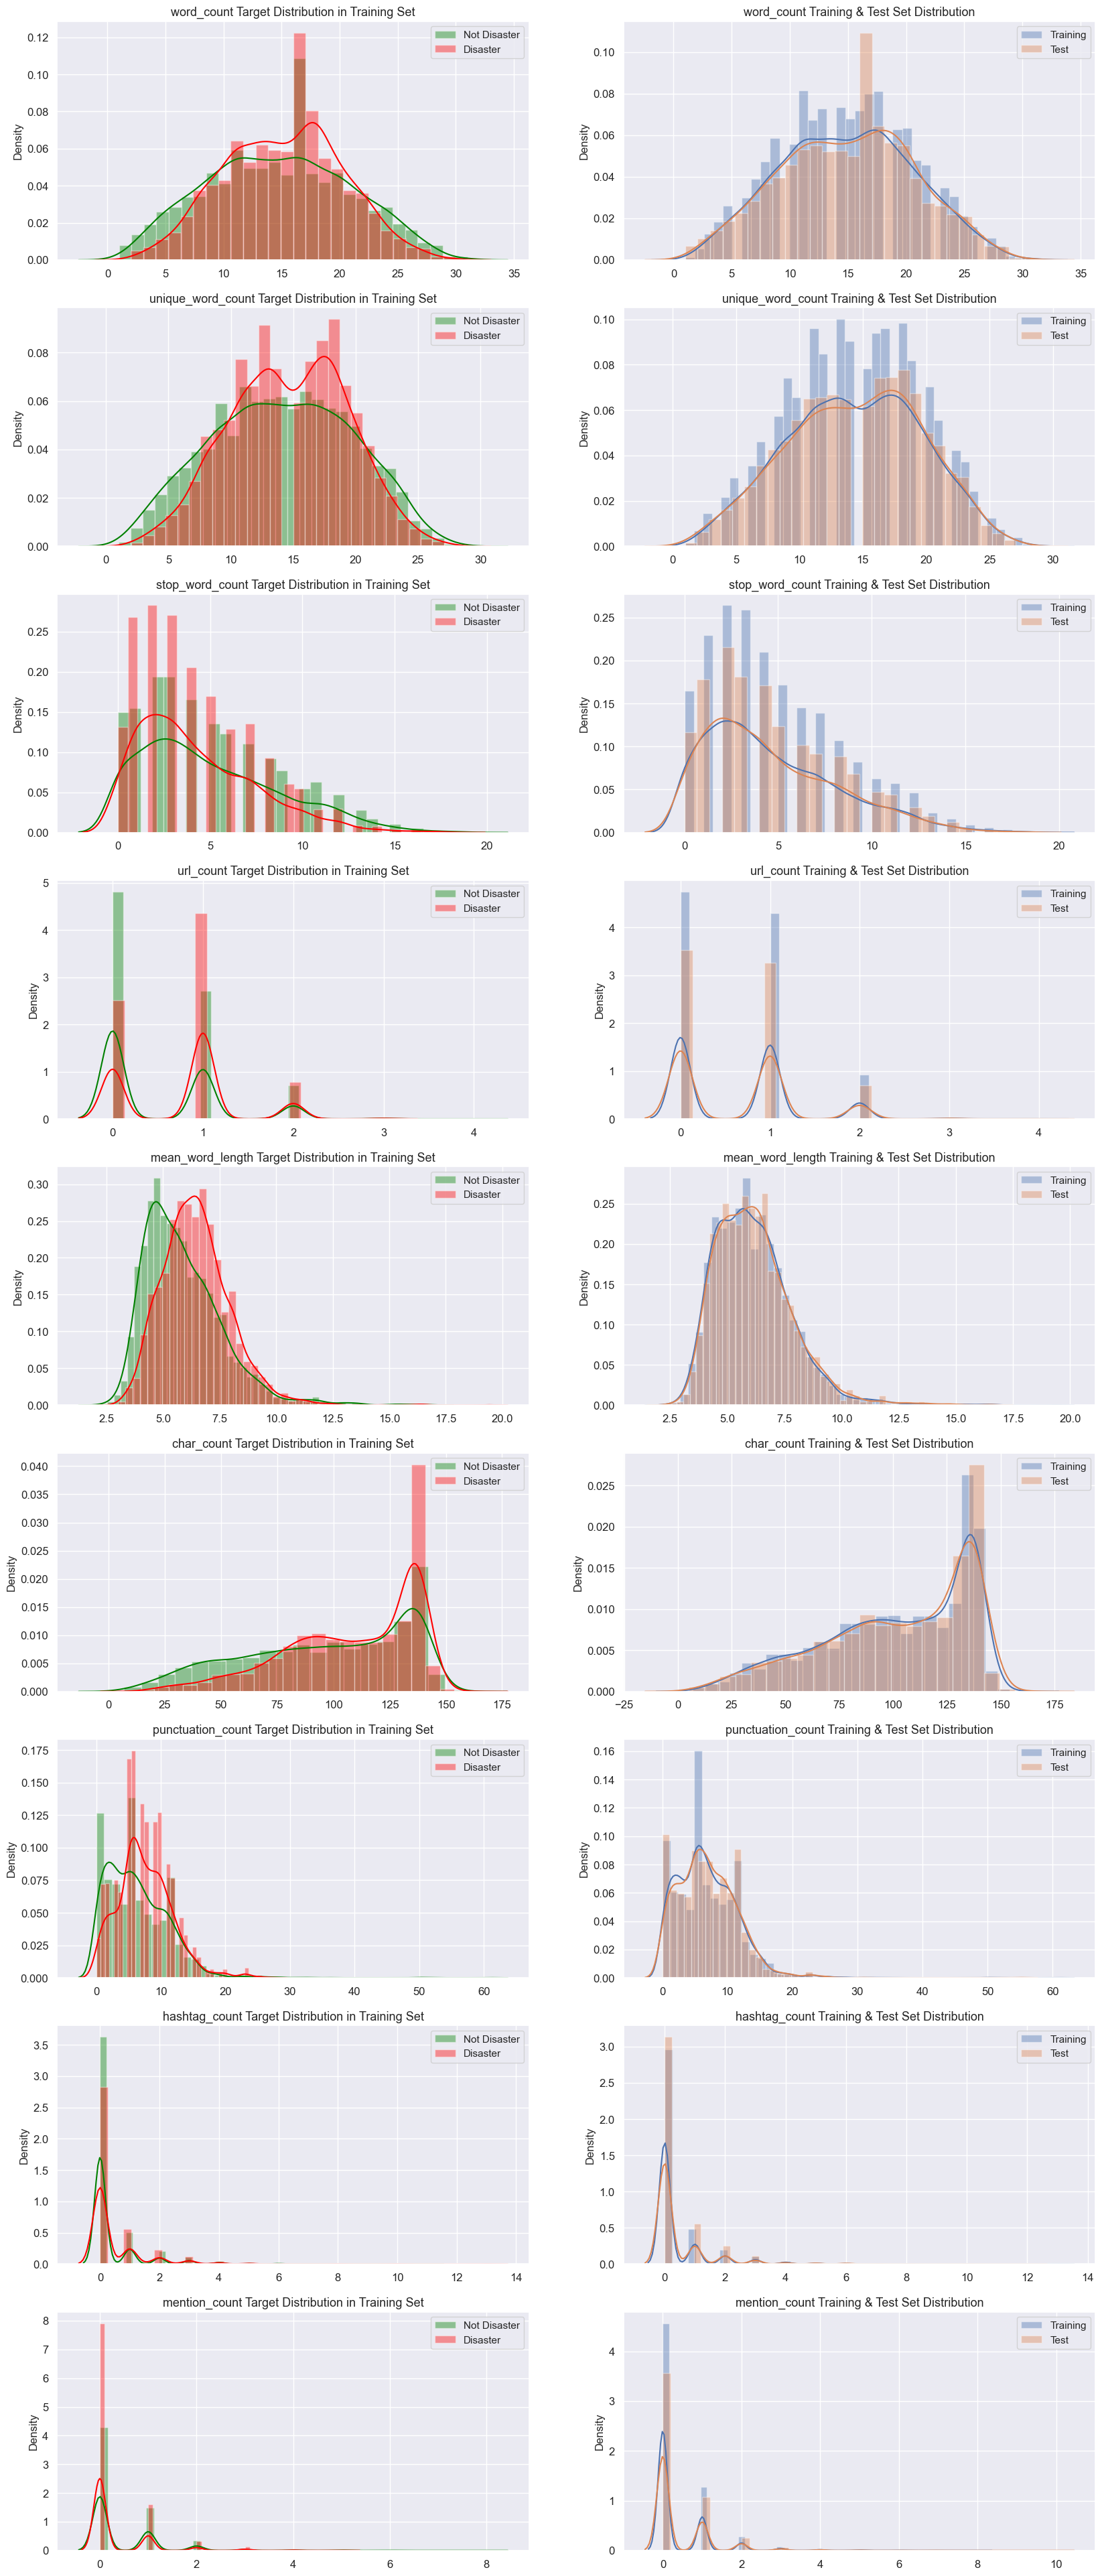



--- 50.95574903488159 seconds ---


In [163]:
# start time to measure the time of the program execution
start_time = time.time()

METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = df_train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

----------------------------------------------

-------------------------------------
#### __Bar Plot for Keywords (Target 1 or 0)__

<AxesSubplot:xlabel='count', ylabel='keyword'>

Text(0.5, 1.0, 'Target Distribution in Keywords')

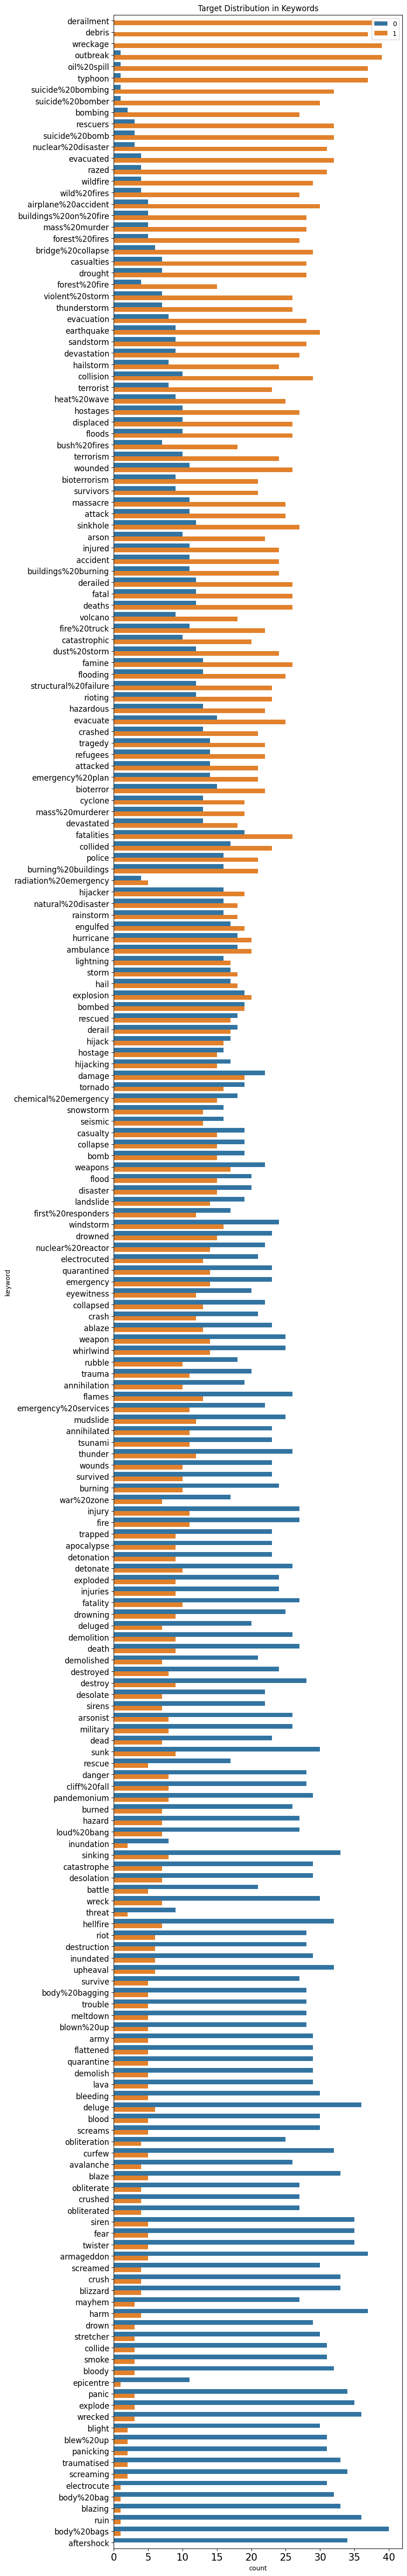



--- 49.13529133796692 seconds ---


In [17]:
# start time to measure the time of the program execution
start_time = time.time()

train_df['target_mean'] = train_df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize = (8, 72), dpi = 100)

sns.countplot(y = train_df.sort_values(by = 'target_mean', ascending=False)['keyword'],
              hue = train_df.sort_values(by = 'target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize = 15)
plt.tick_params(axis='y', labelsize = 12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_df.drop(columns=['target_mean'], inplace=True)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

-------------------------------------------

In [165]:
df_train.info()
df_train

df_test.info()
df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7503 non-null   int64  
 1   keyword                7503 non-null   object 
 2   location               7503 non-null   object 
 3   text                   7503 non-null   object 
 4   target                 7503 non-null   int64  
 5   text_preprocessed      7503 non-null   object 
 6   text_preprocessed_2nd  7503 non-null   object 
 7   word_count             7503 non-null   int64  
 8   unique_word_count      7503 non-null   int64  
 9   stop_word_count        7503 non-null   int64  
 10  url_count              7503 non-null   int64  
 11  mean_word_length       7503 non-null   float64
 12  char_count             7503 non-null   int64  
 13  punctuation_count      7503 non-null   int64  
 14  hashtag_count          7503 non-null   int64  
 15  ment

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive you,deed reason earthquake may allah forgive you,13,13,6,0,4.384615,69,1,1,0
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada,7,7,0,0,4.571429,38,1,0,0
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,resident asked shelter place notified officer ...,22,20,11,0,5.090909,133,3,0,0
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...,8,8,1,0,7.125000,65,2,1,0
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...,16,15,7,0,4.500000,88,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7498,10863,None,None,#WorldNews Fallen powerlines on G:link tram: U...,1,worldnews fallen powerlines g link tram update...,worldnews fallen powerlines g link tram update...,19,19,6,1,6.210526,136,12,1,0
7499,10864,None,None,on the flip side I'm at Walmart and there is a...,1,flip side walmart bomb everyone evacuate stay ...,flip side walmart bomb everyone evacuate stay ...,26,25,17,0,3.423077,114,1,0,0
7500,10866,None,None,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...,suicide bomber kill saudi security site mosque...,20,18,1,1,5.100000,121,11,0,0
7501,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,two giant crane holding bridge collapse nearby...,11,11,2,1,6.636364,83,5,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3263 non-null   int64  
 1   keyword                3263 non-null   object 
 2   location               3263 non-null   object 
 3   text                   3263 non-null   object 
 4   text_preprocessed      3263 non-null   object 
 5   text_preprocessed_2nd  3263 non-null   object 
 6   word_count             3263 non-null   int64  
 7   unique_word_count      3263 non-null   int64  
 8   stop_word_count        3263 non-null   int64  
 9   url_count              3263 non-null   int64  
 10  mean_word_length       3263 non-null   float64
 11  char_count             3263 non-null   int64  
 12  punctuation_count      3263 non-null   int64  
 13  hashtag_count          3263 non-null   int64  
 14  mention_count          3263 non-null   int64  
dtypes: f

,id,keyword,location,text,text_preprocessed,text_preprocessed_2nd,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,0,None,None,Just happened a terrible car crash,happened terrible car crash,happened terrible car crash,6,6,2,0,4.833333,34,0,0,0
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,heard earthquake different city stay safe ever...,9,9,2,0,6.222222,64,3,1,0
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,forest fire spot pond goose fleeing across str...,19,19,10,0,4.105263,96,2,0,0
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire,4,4,0,0,9.250000,40,3,2,0
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan,8,8,2,0,4.750000,45,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...,earthquake safety los angeles safety fastener ...,8,7,0,0,6.000000,55,0,0,0
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...,storm ri worse last hurricane city others hard...,23,22,7,0,5.086957,139,5,0,0
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,green line derailment chicago,6,6,1,1,8.333333,55,5,0,0
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,meg issue hazardous weather outlook hwo,7,7,0,1,8.428571,65,7,0,0


In [166]:
df_train['url_count'].sum()

4685

In [167]:
len(df_train)

7503